# Student_Mat Dataset





### import necessary libraries

In [211]:
# main libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# secondary libraries for further analysis
import numpy as np
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from scipy.stats import wilcoxon

### Exploratory Data Analysis




In [254]:
# change path if necessary
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student-mat copy.csv")

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i, df[i].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


### Creation of New Variables

Standardized G3 Column


In [ ]:
df["G3_Standardized"] = (df["G3"] - df["G3"].mean())/df["G3"].std()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_Standardized,Alcohol
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,-0.963712,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,-0.963712,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,-0.090624,2.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1.000735,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,-0.090624,1.5


## further analysis of variables




In [107]:
# colors for plots
color_rank = ["#faa7d4", "#ade38d", "#99dbe3", "#ffeaae", "#a598eb"]
color_yn = ["#99dbe3", "#ade38d"]

### Individual Situation

**sex**

In [ ]:
sex_t = pd.crosstab(index=df["sex"], columns="Count")
round(sex_t / sex_t.sum(), 3) * 100

([<matplotlib.patches.Wedge at 0x7ed8b3e0e530>,
 [Text(-0.0931934888363163, 1.0960451512773166, 'F'),
  Text(0.09319348883631616, -1.0960451512773166, 'M')],
 [Text(-0.05083281209253616, 0.5978428097876272, '52.7%'),
  Text(0.05083281209253609, -0.5978428097876272, '47.3%')])

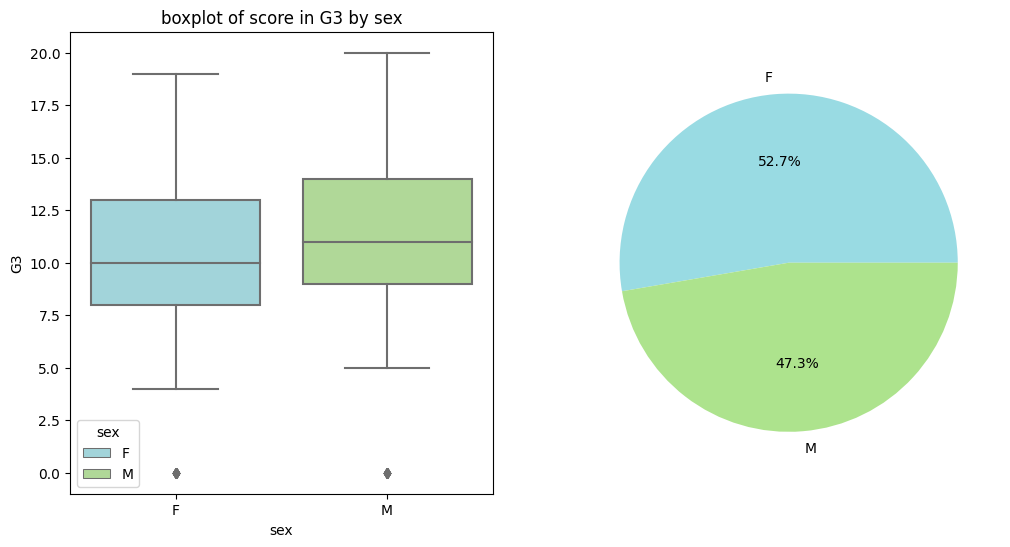

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='sex', y='G3', data=df, palette=color_yn, hue='sex', dodge=False, ax=axes[0]).set(title="boxplot of score in G3 by sex")
plt.pie(sex_t['Count'], labels=sex_t.index, colors=color_yn, autopct='%1.01f%%')

**age**

In [ ]:
age_t = pd.crosstab(index=df["age"], columns="Count")
round(age_t / age_t.sum(), 3) * 100

col_0,Count
age,
15,20.8
16,26.3
17,24.8
18,20.8
19,6.1
20,0.8
21,0.3
22,0.3


Text(0.5, 1.0, 'histogram of age')

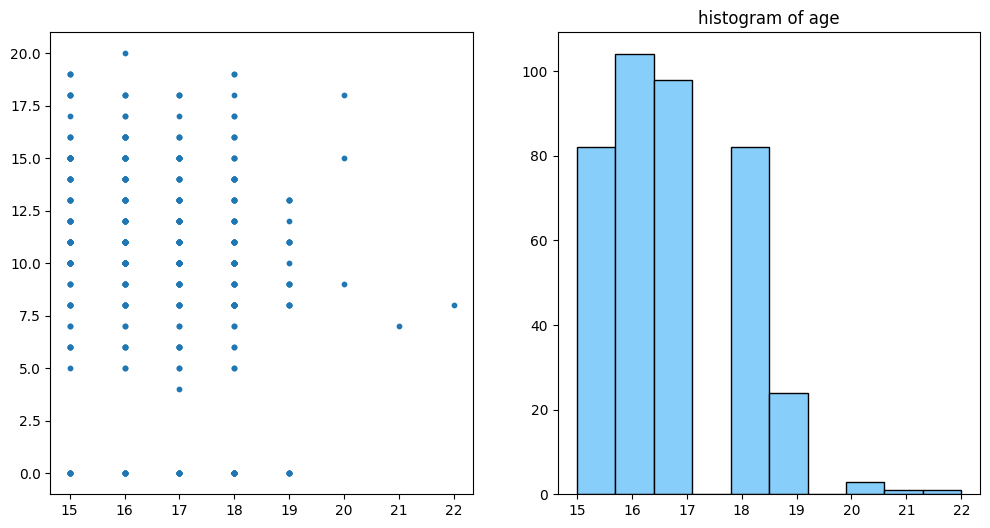

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].scatter(df['age'],df['G3'], marker="o", s=10)
axes[0].ylabel = "G3"
axes[1].hist(df['age'], color="lightskyblue", edgecolor="black")
plt.title("histogram of age")

**absences**

In [ ]:
absences_t = pd.crosstab(index=df["absences"], columns="Count")
absences_t = round(absences_t / absences_t.sum(), 3) * 100

Text(0.5, 1.0, 'histogram of absences')

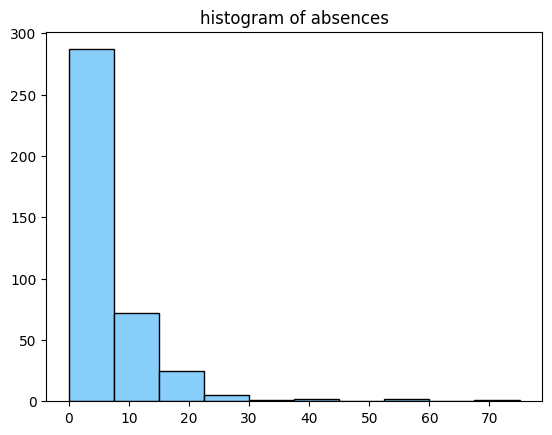

In [ ]:
plt.hist(df['absences'], color="lightskyblue", edgecolor="black")
plt.title("histogram of absences")

**reason**

(reason for choosing school)

In [ ]:
reason_t = pd.crosstab(index=df["reason"], columns="Count")
round(reason_t / reason_t.sum(), 3) * 100

col_0,Count
reason,
course,36.7
home,27.6
other,9.1
reputation,26.6


Text(0.5, 1.0, 'Frequency Table of Reason for Choosing School')

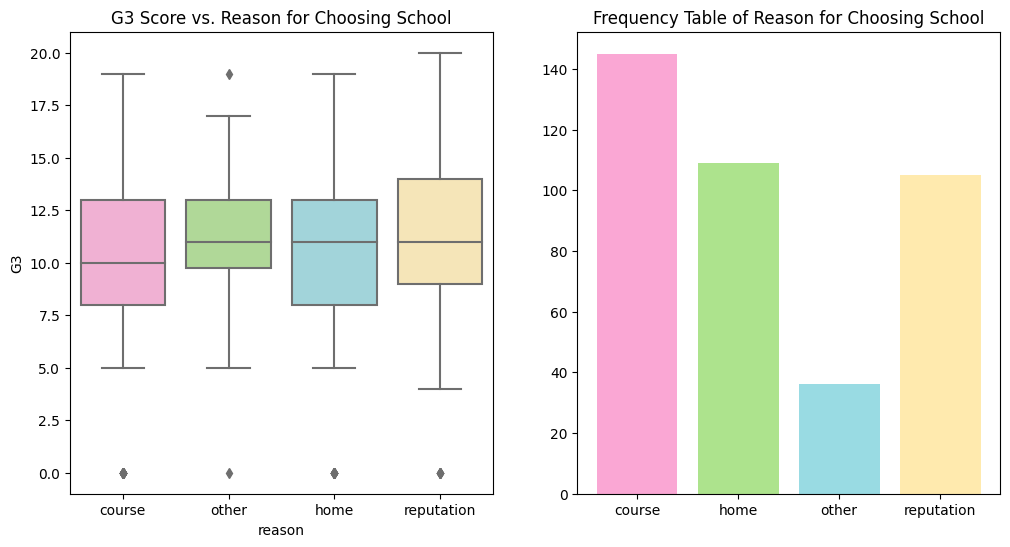

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='reason', y='G3', data=df, palette=("#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"), dodge=False, ax=axes[0]).set(title='G3 Score vs. Reason for Choosing School')
plt.bar(reason_t.index, reason_t['Count'], color=["#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"])
plt.title("Frequency Table of Reason for Choosing School")


**traveltime**

In [ ]:
travel_t = pd.crosstab(index=df["traveltime"], columns="Count")
round(travel_t / travel_t.sum(), 3) * 100

col_0,Count
traveltime,
1,65.1
2,27.1
3,5.8
4,2.0


Text(0.5, 1.0, 'Frequency Table of Travel Time')

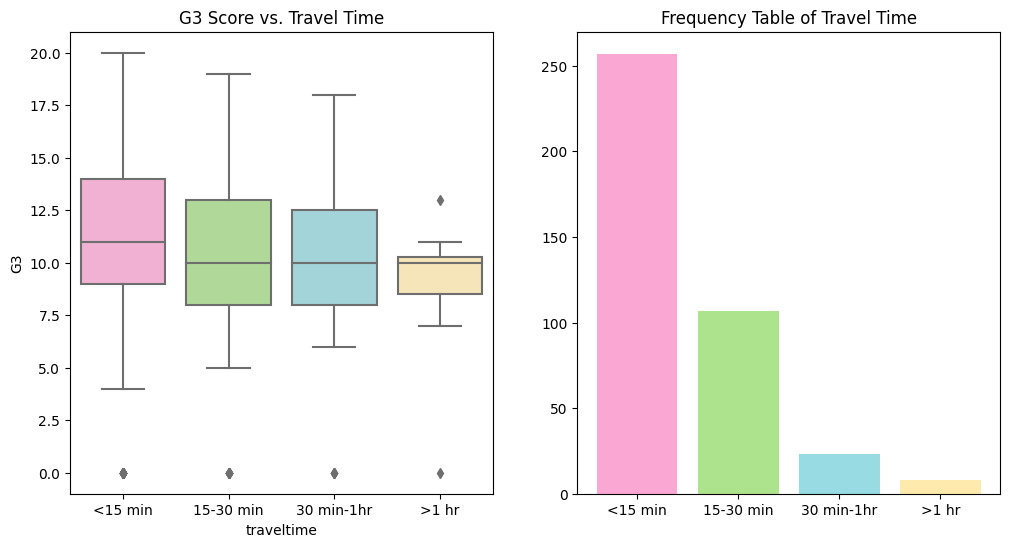

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='traveltime', y='G3', data=df, palette=("#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"), dodge=False, ax=axes[0]).set(title='G3 Score vs. Travel Time', )
axes[0].set_xticklabels(["<15 min", "15-30 min", "30 min-1hr", ">1 hr"])
plt.bar(travel_t.index, travel_t['Count'], color=["#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"])
plt.xticks([1,2,3,4],["<15 min", "15-30 min", "30 min-1hr", ">1 hr"])
plt.title("Frequency Table of Travel Time")

**studytime**

In [ ]:
study_t = pd.crosstab(index=df["studytime"], columns="Count")
round(study_t / study_t.sum(), 3) * 100

col_0,Count
studytime,
1,26.6
2,50.1
3,16.5
4,6.8


Text(0.5, 1.0, 'Frequency Table of Study Time')

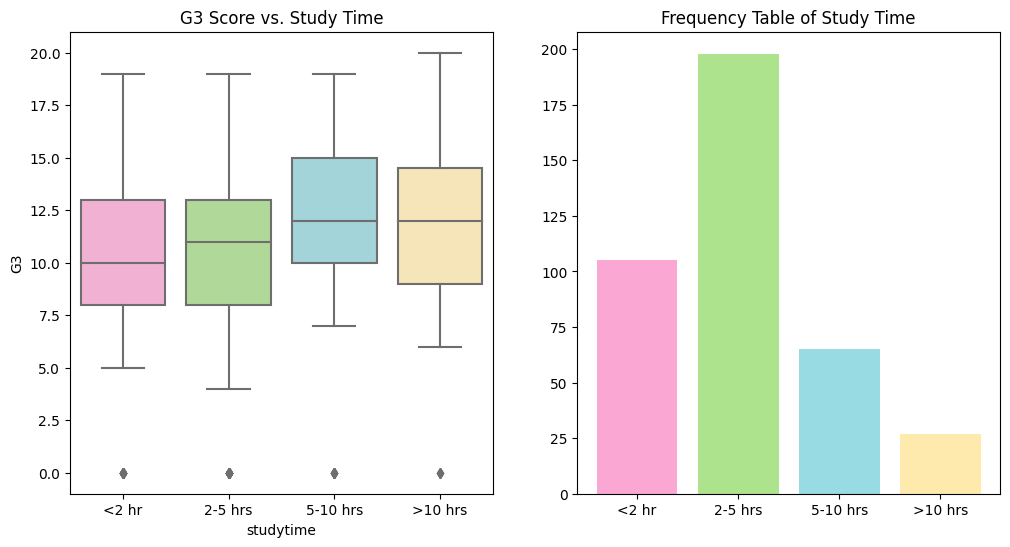

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='studytime', y='G3', data=df, palette=("#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"), dodge=False, ax=axes[0]).set(title='G3 Score vs. Study Time', )
axes[0].set_xticklabels(["<2 hr", "2-5 hrs", "5-10 hrs", ">10 hrs"])
plt.bar(study_t.index, study_t['Count'], color=["#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"])
plt.xticks([1,2,3,4],["<2 hr", "2-5 hrs", "5-10 hrs", ">10 hrs"])
plt.title("Frequency Table of Study Time")

**higher**

In [ ]:
higher_t = pd.crosstab(index=df["higher"], columns="Count")
round(higher_t / higher_t.sum(), 3) * 100

col_0,Count
higher,
no,5.1
yes,94.9


Text(0.5, 1.0, 'Wants to Continue to Higher Education')

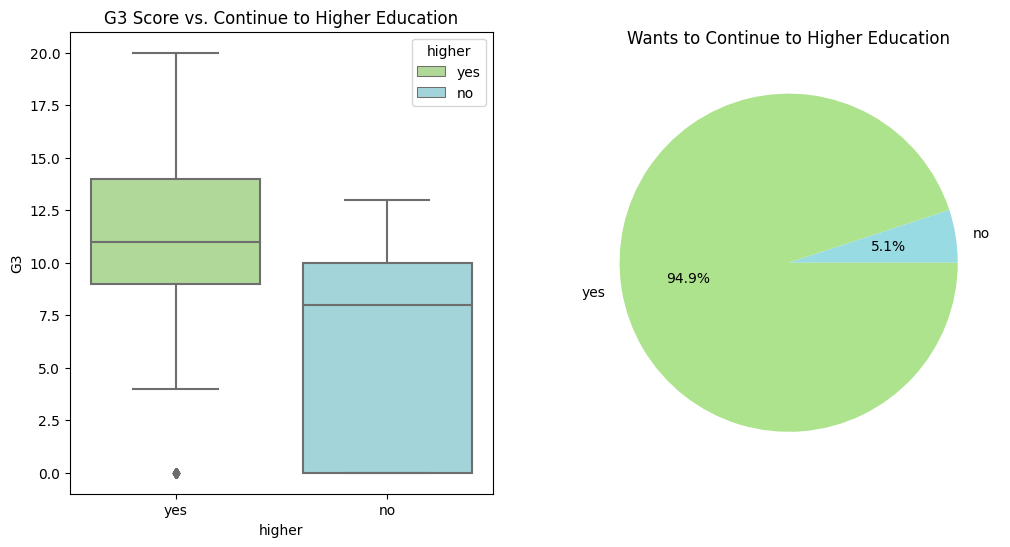

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='higher', y='G3', data=df, palette=palette_yn, hue='higher', dodge=False, ax=axes[0]).set(title='G3 Score vs. Continue to Higher Education')
plt.pie(higher_t['Count'], labels=higher_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Wants to Continue to Higher Education')

**health**

In [ ]:
health_t = pd.crosstab(index=df['health'], columns='Count')
health_t/ health_t.sum()*100

col_0,Count
health,
1,11.898734
2,11.392405
3,23.037975
4,16.708861
5,36.962025


Text(0.5, 1.0, 'Health Status Ranking')

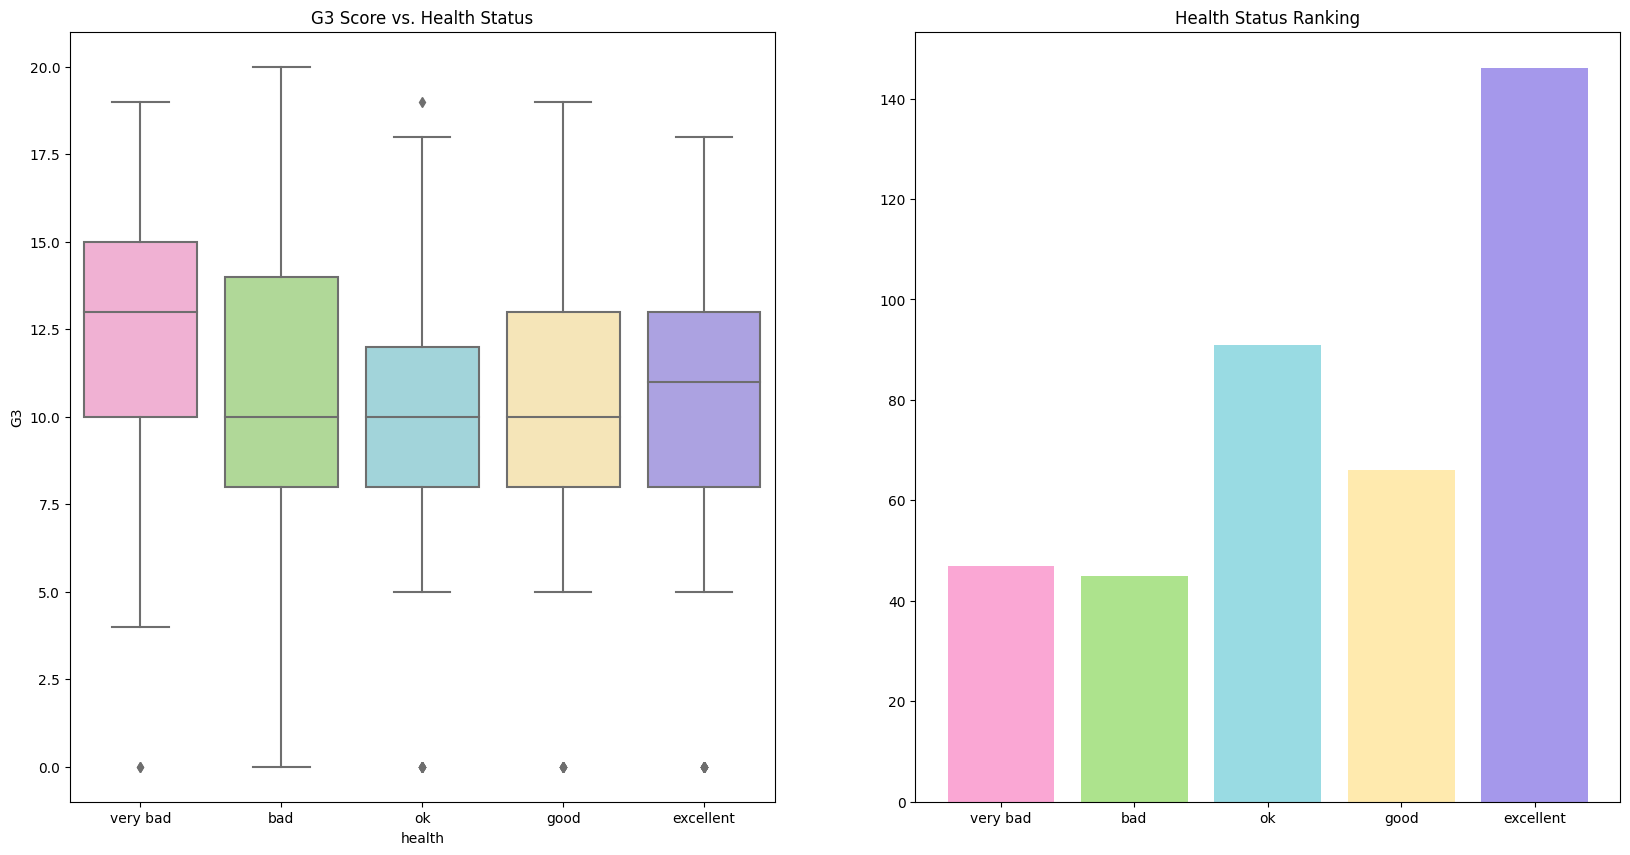

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x='health', y='G3', data=df, palette=palette_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Health Status')
axes[0].set_xticklabels(["very bad", "bad", "ok", "good", "excellent"])
plt.bar(health_t.index, health_t["Count"], color=color_rank)
plt.xticks([1, 2, 3, 4, 5], ["very bad", "bad", "ok", "good", "excellent"])
plt.title('Health Status Ranking')

### Family Background

**address**

In [ ]:
add_t = pd.crosstab(index=df["address"], columns="Count")
round(add_t / add_t.sum(), 3) * 100

col_0,Count
address,
R,22.3
U,77.7


([<matplotlib.patches.Wedge at 0x7ed8b2d26fb0>,
 [Text(0.8413978714912627, 0.7085546004719558, 'R'),
  Text(-0.8413978714912627, -0.7085546004719558, 'U')],
 [Text(0.45894429354068866, 0.38648432753015766, '22.3%'),
  Text(-0.45894429354068866, -0.38648432753015766, '77.7%')])

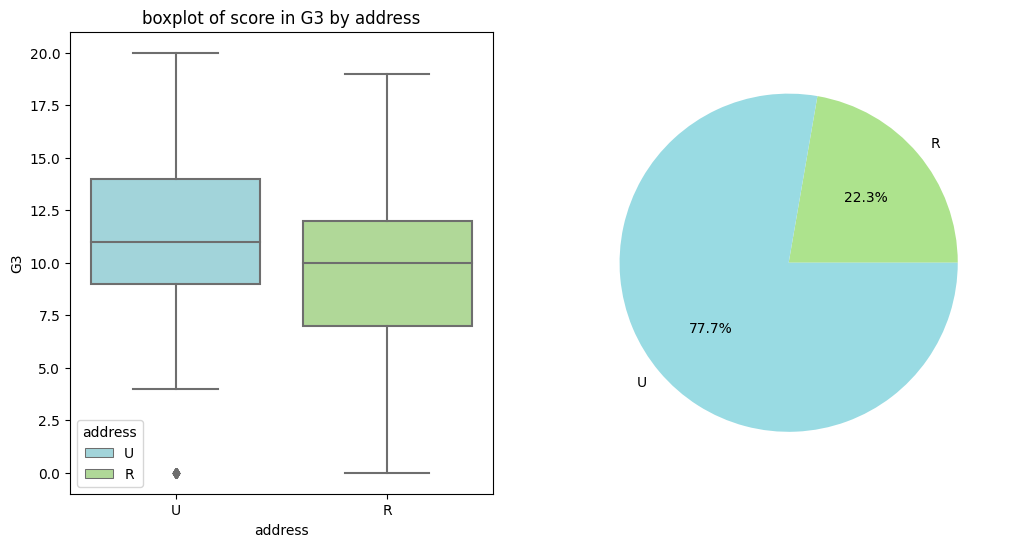

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='address', y='G3', data=df, palette=color_yn, hue='address', dodge=False, ax=axes[0]).set(title="boxplot of score in G3 by address")
plt.pie(add_t['Count'], labels=add_t.index, colors=["#ade38d", "#99dbe3"], autopct='%1.01f%%')

**famsize**

In [ ]:
famsize_t = pd.crosstab(index=df["famsize"], columns="Count")
round(famsize_t / famsize_t.sum(), 3) * 100

col_0,Count
famsize,
GT3,71.1
LE3,28.9


([<matplotlib.patches.Wedge at 0x7ed8b2c1df30>,
 [Text(-0.6779933629095753, 0.8662130222125302, 'GT3'),
  Text(0.6779933629095752, -0.8662130222125302, 'LE3')],
 [Text(-0.36981456158704107, 0.47247983029774365, '71.1%'),
  Text(0.369814561587041, -0.47247983029774365, '28.9%')])

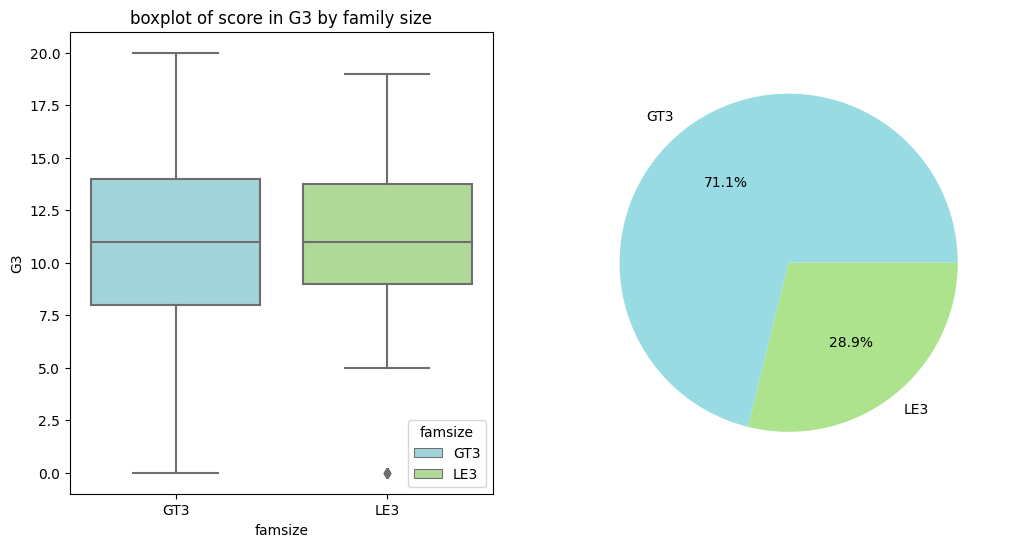

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='famsize', y='G3', data=df, palette=color_yn, hue='famsize', dodge=False, ax=axes[0]).set(title="boxplot of score in G3 by family size")
plt.pie(famsize_t['Count'], labels=famsize_t.index, colors=color_yn, autopct='%1.01f%%')

**Pstatus**

In [ ]:
pstat_t = pd.crosstab(index=df["Pstatus"], columns="Count")
round(pstat_t / pstat_t.sum(), 3) * 100

col_0,Count
Pstatus,
A,10.4
T,89.6


([<matplotlib.patches.Wedge at 0x7ed8b2b14c40>,
 [Text(1.0420325558365862, 0.35237501695873985, 'A'),
  Text(-1.0420325888283117, -0.3523749193966091, 'T')],
 [Text(0.5683813940926833, 0.19220455470476716, '10.4%'),
  Text(-0.56838141208817, -0.1922045014890595, '89.6%')])

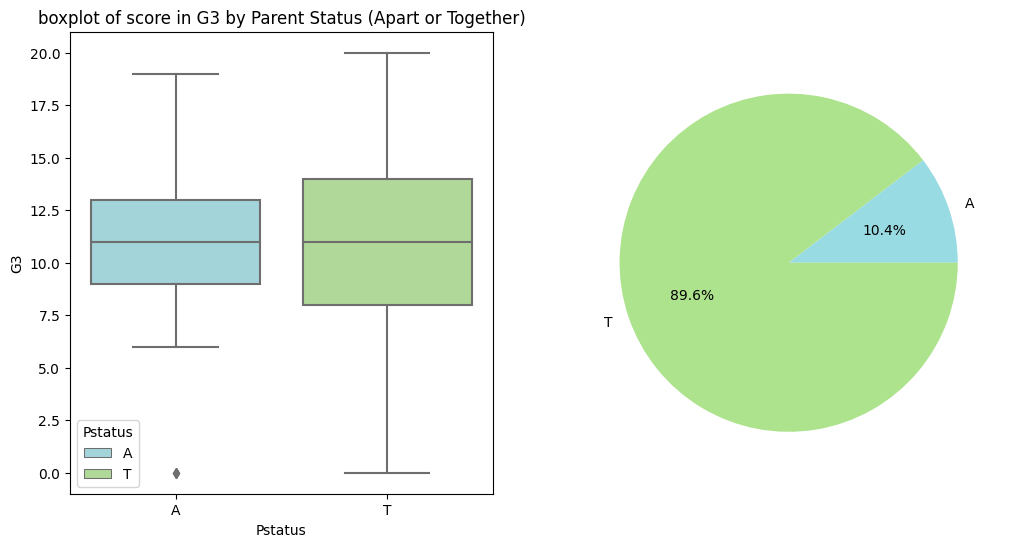

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='Pstatus', y='G3', data=df, palette=color_yn, hue='Pstatus', dodge=False, ax=axes[0]).set(title="boxplot of score in G3 by Parent Status (Apart or Together)")
plt.pie(pstat_t['Count'], labels=pstat_t.index, colors=color_yn, autopct='%1.01f%%')

**Medu**

In [ ]:
medu_t = pd.crosstab(index=df["Medu"], columns="Count")
round(medu_t / medu_t.sum(), 3) * 100

col_0,Count
Medu,
0,0.8
1,14.9
2,26.1
3,25.1
4,33.2


Text(0.5, 1.0, 'Frequency Table of Mother Education')

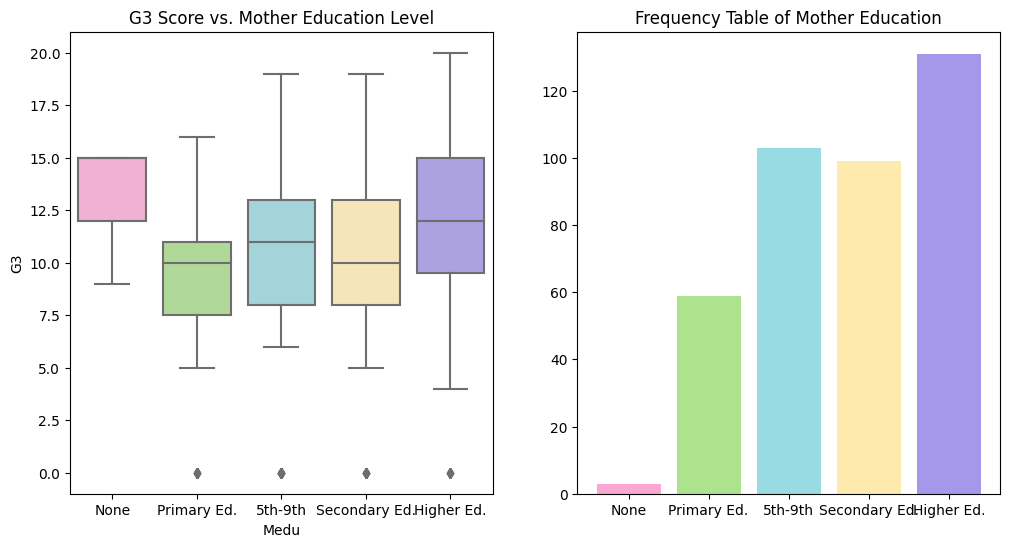

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='Medu', y='G3', data=df, palette=color_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Mother Education Level', )
axes[0].set_xticklabels(["None", "Primary Ed.", "5th-9th", "Secondary Ed.", "Higher Ed."])
plt.bar(medu_t.index, medu_t['Count'], color=color_rank)
plt.xticks([0, 1, 2, 3, 4], ["None", "Primary Ed.", "5th-9th", "Secondary Ed.", "Higher Ed."])
plt.title("Frequency Table of Mother Education")

**Fedu**

In [ ]:
fedu_t = pd.crosstab(index=df["Fedu"], columns="Count")
round(fedu_t / fedu_t.sum(), 3) * 100

col_0,Count
Fedu,
0,0.5
1,20.8
2,29.1
3,25.3
4,24.3


Text(0.5, 1.0, 'Frequency Table of Father Education')

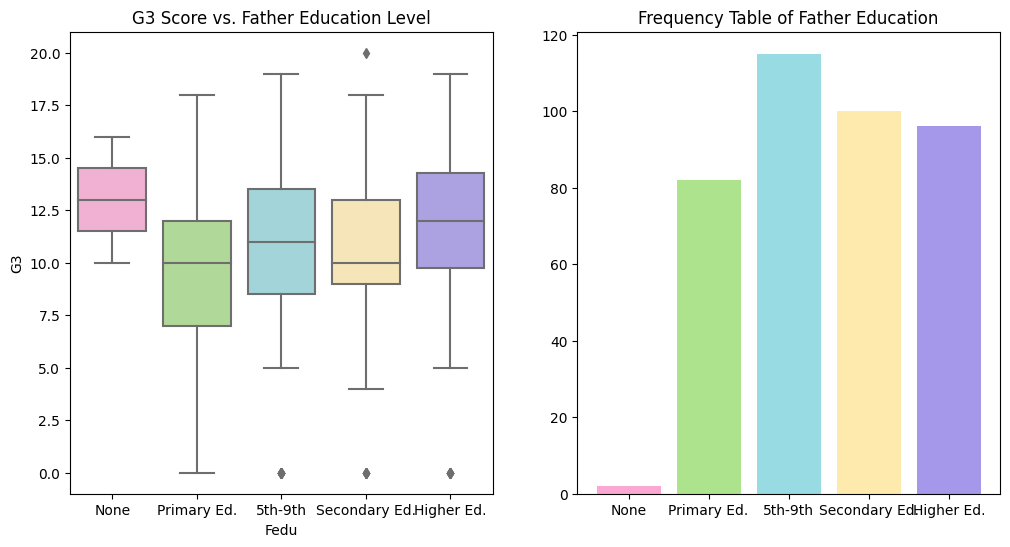

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='Fedu', y='G3', data=df, palette=color_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Father Education Level', )
axes[0].set_xticklabels(["None", "Primary Ed.", "5th-9th", "Secondary Ed.", "Higher Ed."])
plt.bar(fedu_t.index, fedu_t['Count'], color=color_rank)
plt.xticks([0, 1, 2, 3, 4], ["None", "Primary Ed.", "5th-9th", "Secondary Ed.", "Higher Ed."])
plt.title("Frequency Table of Father Education")

**Mjob**

In [ ]:
mjob_t = pd.crosstab(index=df["Mjob"], columns="Count")
round(mjob_t / mjob_t.sum(), 3) * 100

col_0,Count
Mjob,
at_home,14.9
health,8.6
other,35.7
services,26.1
teacher,14.7


Text(0.5, 1.0, 'Frequency Table of Mother Job Type')

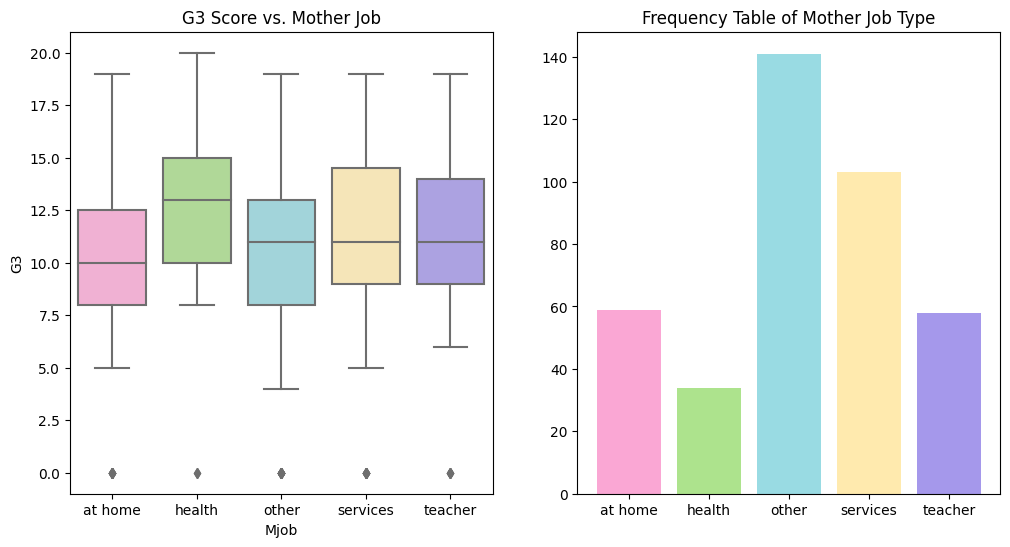

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='Mjob', y='G3', data=df, palette=color_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Mother Job', )
axes[0].set_xticklabels(["at home", "health", "other", "services", "teacher"])
plt.bar(mjob_t.index, mjob_t['Count'], color=color_rank)
plt.xticks([0, 1, 2, 3, 4], ["at home", "health", "other", "services", "teacher"])
plt.title("Frequency Table of Mother Job Type")

**Fjob**

In [ ]:
fjob_t = pd.crosstab(index=df["Fjob"], columns="Count")
round(fjob_t / fjob_t.sum(), 3) * 100

col_0,Count
Fjob,
at_home,5.1
health,4.6
other,54.9
services,28.1
teacher,7.3


Text(0.5, 1.0, 'Frequency Table of Father Job Type')

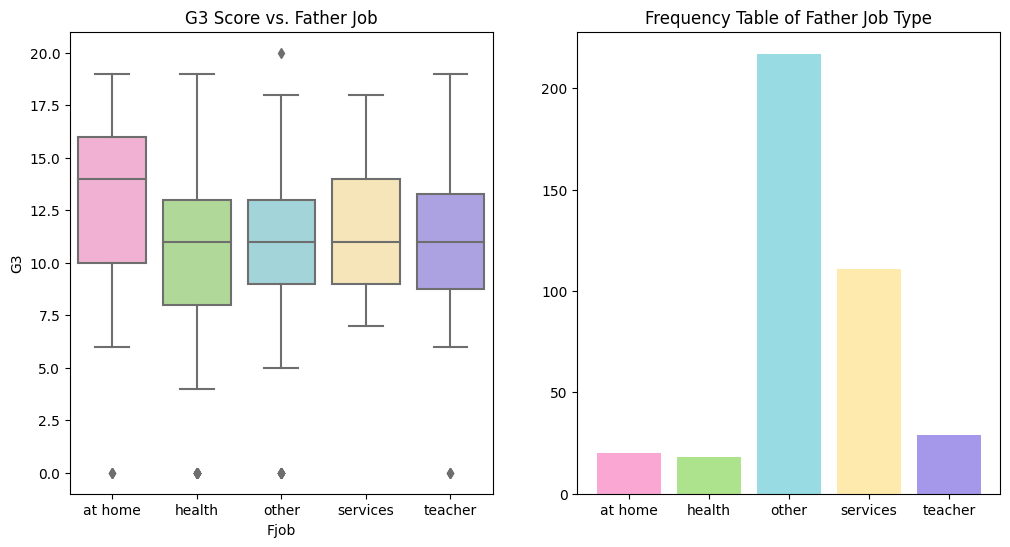

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='Fjob', y='G3', data=df, palette=color_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Father Job', )
axes[0].set_xticklabels(["at home", "health", "other", "services", "teacher"])
plt.bar(fjob_t.index, fjob_t['Count'], color=color_rank)
plt.xticks([0, 1, 2, 3, 4], ["at home", "health", "other", "services", "teacher"])
plt.title("Frequency Table of Father Job Type")

**guardian**

In [ ]:
guardian_t = pd.crosstab(index=df["guardian"], columns="Count")
round(guardian_t / guardian_t.sum(), 3) * 100

col_0,Count
guardian,
father,22.8
mother,69.1
other,8.1


Text(0.5, 1.0, 'Frequency Table of Guardian')

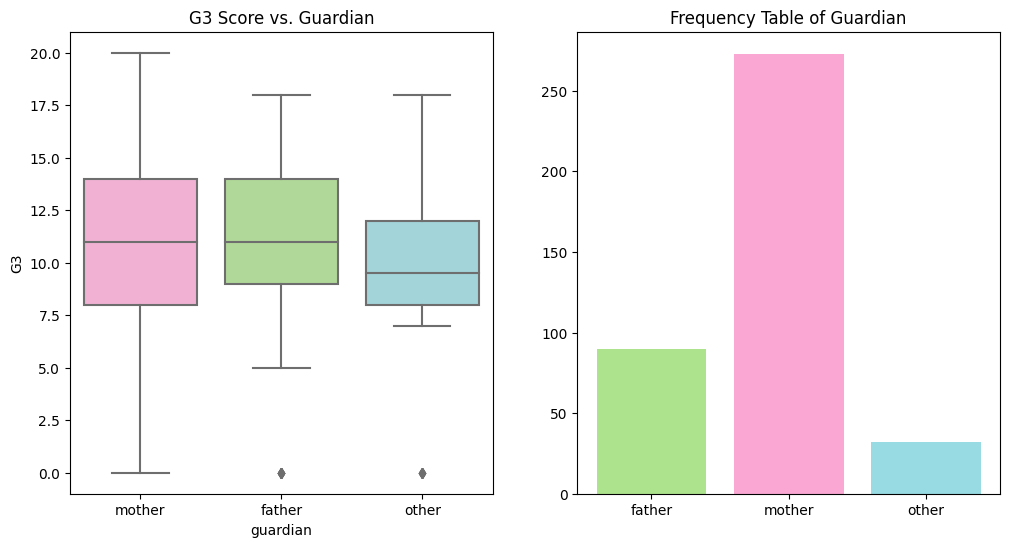

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='guardian', y='G3', data=df, palette=("#faa7d4", "#ade38d", "#99dbe3"), dodge=False, ax=axes[0]).set(title='G3 Score vs. Guardian', )
axes[0].set_xticklabels(["mother", "father", "other"])
plt.bar(guardian_t.index, guardian_t['Count'], color=["#ade38d", "#faa7d4", "#99dbe3"])
plt.xticks([0,1,2], ["father", "mother", "other"])
plt.title("Frequency Table of Guardian")

**famsup**

In [ ]:
famsup_t = pd.crosstab(index=df['famsup'], columns='Count')
famsup_t = famsup_t/ famsup_t.sum()

Text(0.5, 1.0, 'Receive Family Educational Support')

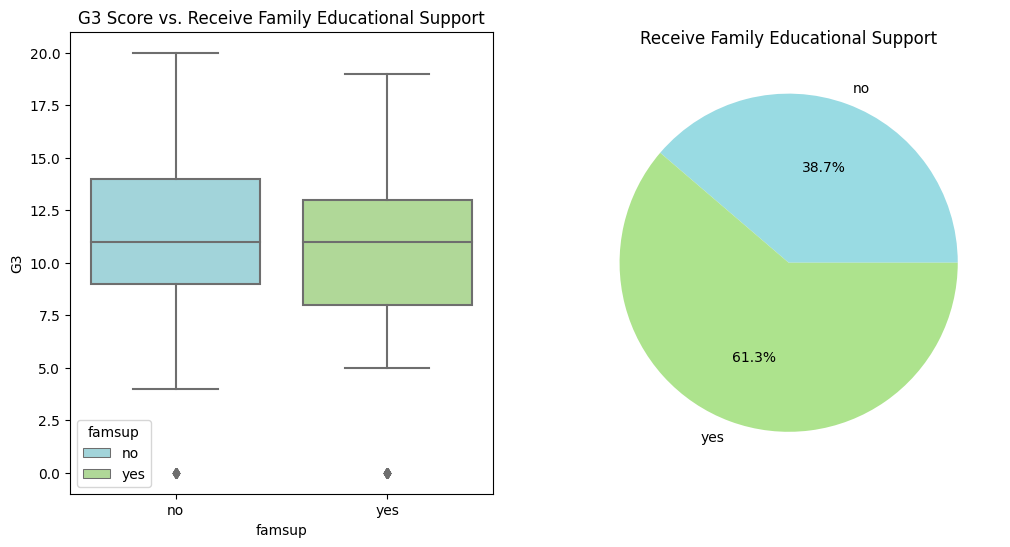

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='famsup', y='G3', data=df, palette=palette_yn, hue='famsup', dodge=False, ax=axes[0]).set(title='G3 Score vs. Receive Family Educational Support')
plt.pie(famsup_t['Count'], labels=famsup_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Receive Family Educational Support')

Text(0.5, 1.0, 'Average G3 Score by Family Education Support')

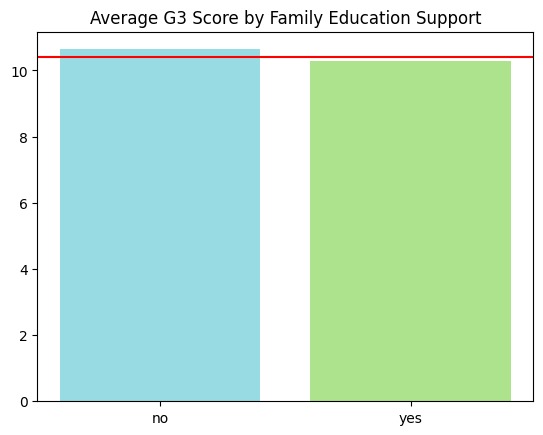

In [ ]:
famsup_mean = df.groupby('famsup')['G3'].mean()
plt.bar(famsup_mean.index, famsup_mean, color=color_yn)
plt.axhline(y=df['G3'].mean(), color='red')
plt.title("Average G3 Score by Family Education Support")

**internet**

In [ ]:
int_t = pd.crosstab(index=df["internet"], columns="Count")
round(int_t / int_t.sum(), 3) * 100

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='internet', y='G3', data=df, palette=palette_yn, hue='internet', dodge=False, ax=axes[0]).set(title='G3 Score vs. Home Internet Access')
plt.pie(int_t['Count'], labels=int_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Access to Internet from Home')

#### **famrel**



In [ ]:
famrel_t = pd.crosstab(index=df['famrel'], columns='Count')
famrel_t/ famrel_t.sum() * 100

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x='famrel', y='G3', data=df, palette=palette_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Family Relationship Ranking')
axes[0].set_xticklabels(["very bad", "bad", "ok", "good", "excellent"])
plt.bar(famrel_t.index, famrel_t["Count"], color=color_rank)
plt.xticks([1, 2, 3, 4, 5], ["very bad", "bad", "ok", "good", "excellent"])
plt.title('Family Relationship Ranking')

In [ ]:
famrel_mean = df.groupby('famrel')['G3'].mean()
plt.bar(famrel_mean.index, famrel_mean, color=color_rank)
plt.axhline(y=df['G3'].mean(), color='red')
plt.xticks([1, 2, 3, 4, 5], ["very bad", "bad", "ok", "good", "excellent"])
plt.title("Average G3 Score by Relationship with Family Rank")

### School Aspect

**school**

In [ ]:
school_t = pd.crosstab(index=df['school'], columns='Count')
school_t/ school_t.sum() * 100

col_0,Count
school,
GP,88.35443
MS,11.64557


([<matplotlib.patches.Wedge at 0x7ed8b26a5930>,
 [Text(-1.0271995431128091, 0.3935239492443079, 'GP'),
  Text(1.0271995707460848, -0.39352387711428577, 'MS')],
 [Text(-0.5602906598797139, 0.21464942686053154, '88.4%'),
  Text(0.5602906749524098, -0.21464938751688312, '11.6%')])

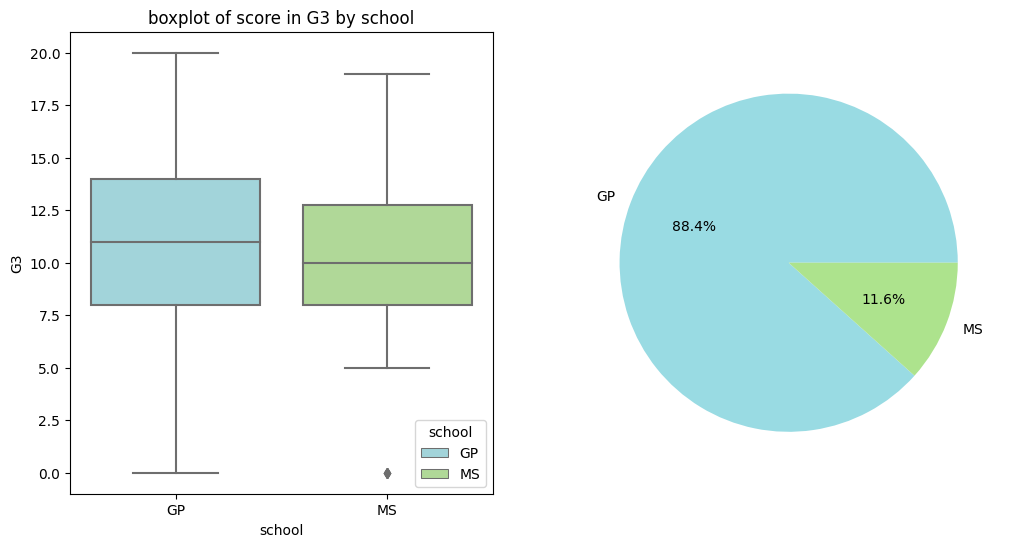

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='school', y='G3', data=df, palette=color_yn, hue='school', dodge=False, ax=axes[0]).set(title="boxplot of score in G3 by school")
plt.pie(school_t['Count'], labels=school_t.index, colors=color_yn, autopct='%1.01f%%')

**failures**

In [ ]:
failure_t = pd.crosstab(index=df["failures"], columns="Count")
round(failure_t / failure_t.sum(), 3) * 100

col_0,Count
failures,
0,79.0
1,12.7
2,4.3
3,4.1


Text(0.5, 1.0, 'Frequency Table of Failures')

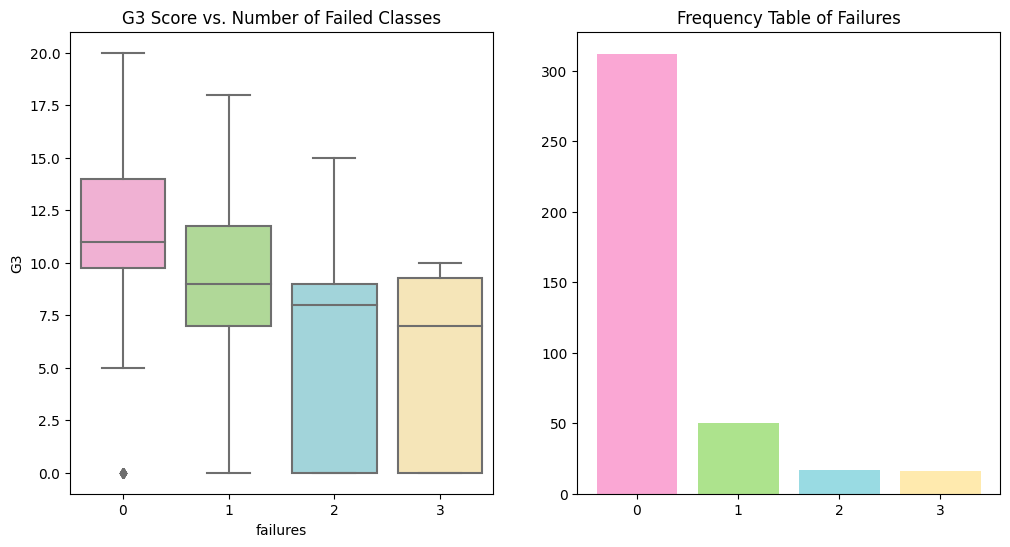

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='failures', y='G3', data=df, palette=("#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"), dodge=False, ax=axes[0]).set(title='G3 Score vs. Number of Failed Classes', )
axes[0].set_xticklabels(["<2 hr", "2-5 hrs", "5-10 hrs", ">10 hrs"])
plt.bar(failure_t.index, failure_t['Count'], color=["#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"])
plt.xticks([0, 1, 2, 3])
plt.title("Frequency Table of Failures")

**schoolsup**

In [ ]:
schoolsup_t = pd.crosstab(index=df['schoolsup'], columns='Count')
schoolsup_t = schoolsup_t/ schoolsup_t.sum()

Text(0.5, 1.0, 'Receive School Educational Support')

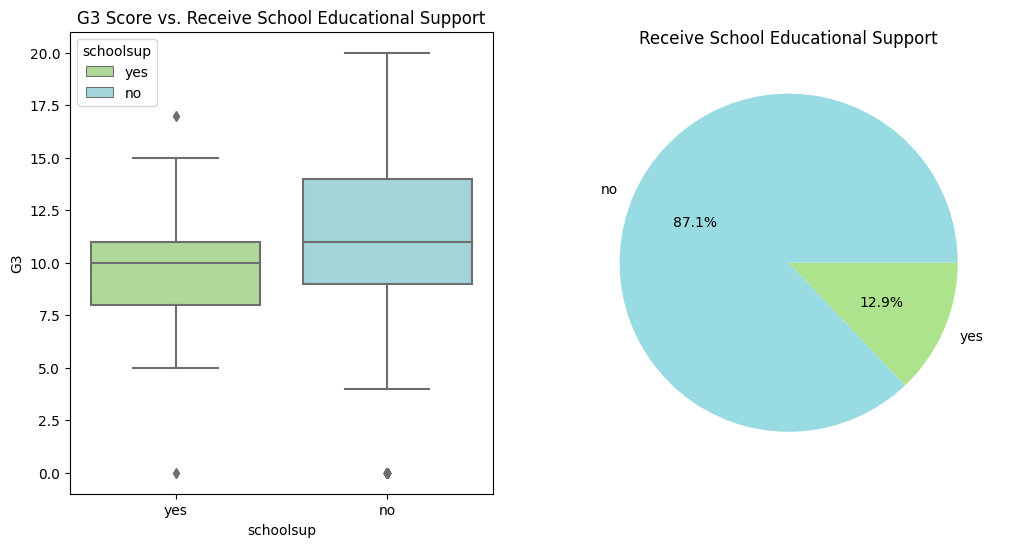

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='schoolsup', y='G3', data=df, palette=palette_yn, hue='schoolsup', dodge=False, ax=axes[0]).set(title='G3 Score vs. Receive School Educational Support')
plt.pie(schoolsup_t['Count'], labels=schoolsup_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Receive School Educational Support')

Text(0, 0.5, 'G3 Score')

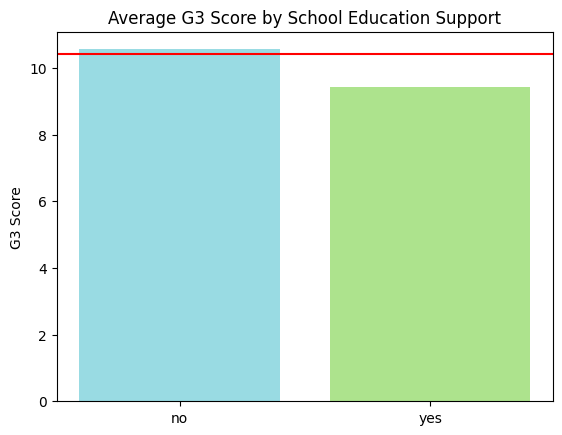

In [ ]:
schoolsup_mean = df.groupby('schoolsup')['G3'].mean()
plt.bar(schoolsup_mean.index, schoolsup_mean, color=color_yn)
plt.axhline(y=df['G3'].mean(), color='red')
plt.title("Average G3 Score by School Education Support")
plt.ylabel("G3 Score")

**paid**



In [ ]:
paid_t = pd.crosstab(index=df['paid'], columns='Count')
paid_t = paid_t/ paid_t.sum()

Text(0.5, 1.0, 'Paid for Extra Classes')

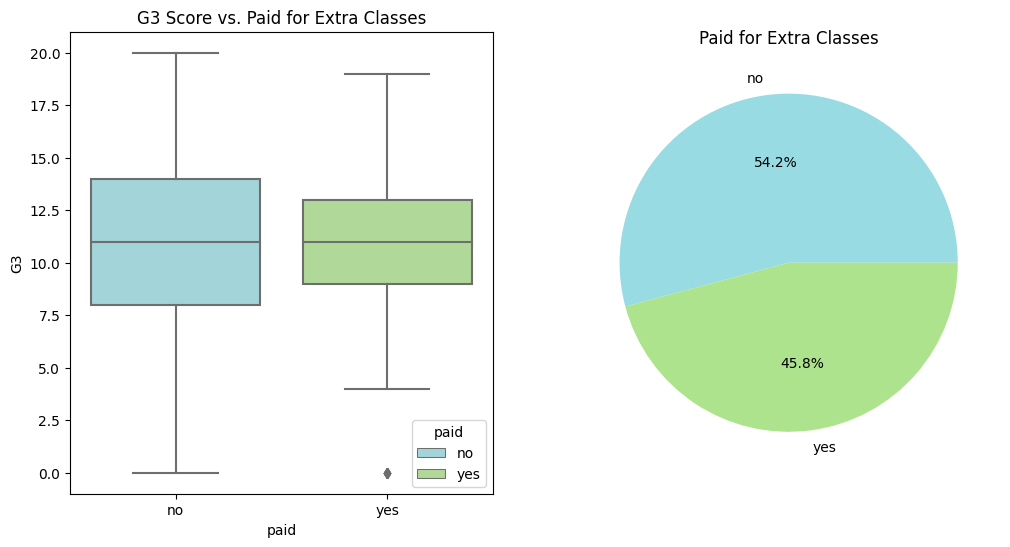

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='paid', y='G3', data=df, palette=palette_yn, hue='paid', dodge=False, ax=axes[0]).set(title='G3 Score vs. Paid for Extra Classes')
plt.pie(paid_t['Count'], labels=paid_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Paid for Extra Classes')

Text(0, 0.5, 'G3 Score')

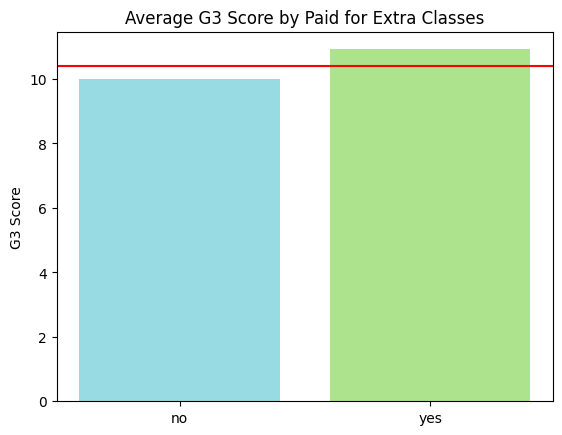

In [ ]:
paid_mean = df.groupby('paid')['G3'].mean()
plt.bar(paid_mean.index, paid_mean, color=color_yn)
plt.axhline(y=df['G3'].mean(), color='red')
plt.title("Average G3 Score by Paid for Extra Classes")
plt.ylabel("G3 Score")

**activities**


In [ ]:
activities_t = pd.crosstab(index=df['activities'], columns='Count')
activities_t = activities_t/ activities_t.sum()

Text(0.5, 1.0, 'Involved in Activities')

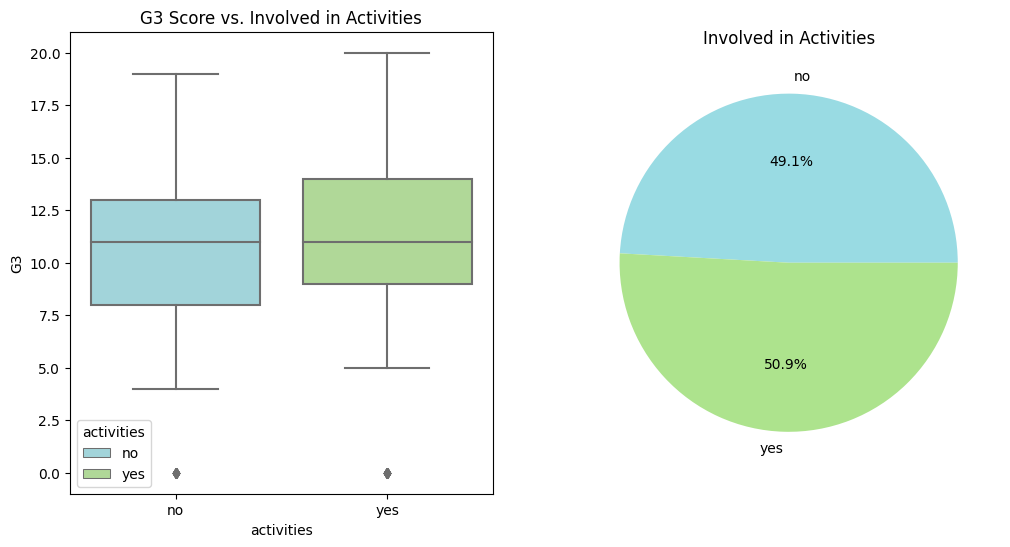

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(x='activities', y='G3', data=df, palette=palette_yn, hue='activities', dodge=False, ax=axes[0]).set(title='G3 Score vs. Involved in Activities')
plt.pie(activities_t['Count'], labels=activities_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Involved in Activities')

Text(0, 0.5, 'G3 Score')

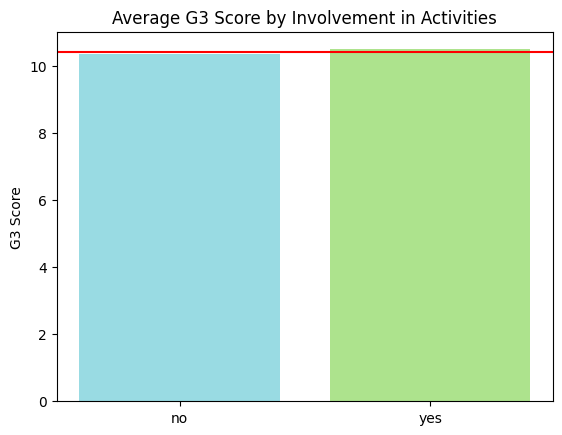

In [ ]:
activities_mean = df.groupby('activities')['G3'].mean()
plt.bar(activities_mean.index, activities_mean, color=color_yn)
plt.axhline(y=df['G3'].mean(), color='red')
plt.title("Average G3 Score by Involvement in Activities")
plt.ylabel("G3 Score")

**nursery**

In [ ]:
nursery_t = pd.crosstab(index=df["nursery"], columns="Count")
round(nursery_t / nursery_t.sum(), 3) * 100

col_0,Count
nursery,
no,20.5
yes,79.5


Text(0.5, 1.0, 'Attended Nursery School')

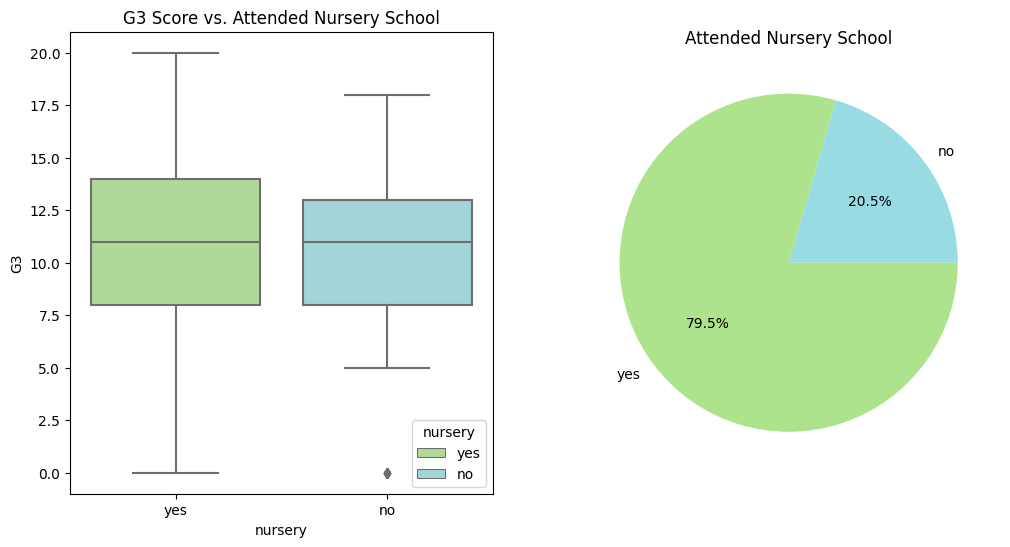

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='nursery', y='G3', data=df, palette=palette_yn, hue='nursery', dodge=False, ax=axes[0]).set(title='G3 Score vs. Attended Nursery School')
plt.pie(nursery_t['Count'], labels=nursery_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Attended Nursery School')

**G1**


In [ ]:
g1_t = pd.crosstab(index=df["G1"], columns="Count")
g1_t = round(g1_t / g1_t.sum(), 3) * 100

Text(0.5, 1.0, 'histogram of score in G1')

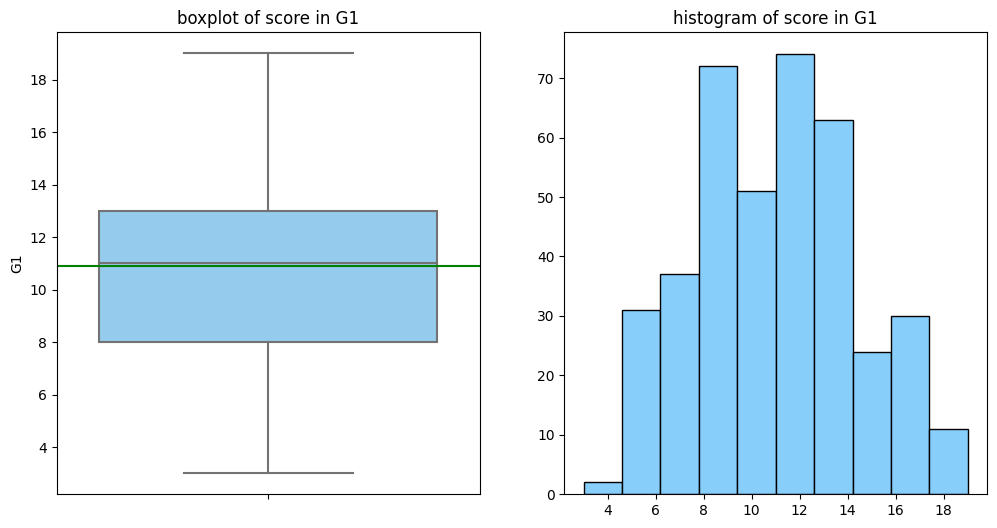

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(y='G1', data=df, color="lightskyblue", ax=axes[0]).set(title="boxplot of score in G1")
axes[0].ylabel = "G1"
axes[0].axhline(y=df['G1'].mean(), color='green')

axes[1].hist(df['G1'], color="lightskyblue", edgecolor="black")
plt.title("histogram of score in G1")

**G2**

In [ ]:
g2_t = pd.crosstab(index=df["G2"], columns="Count")
g2_t = round(g2_t / g2_t.sum(), 3) * 100

Text(0.5, 1.0, 'histogram of score in G2')

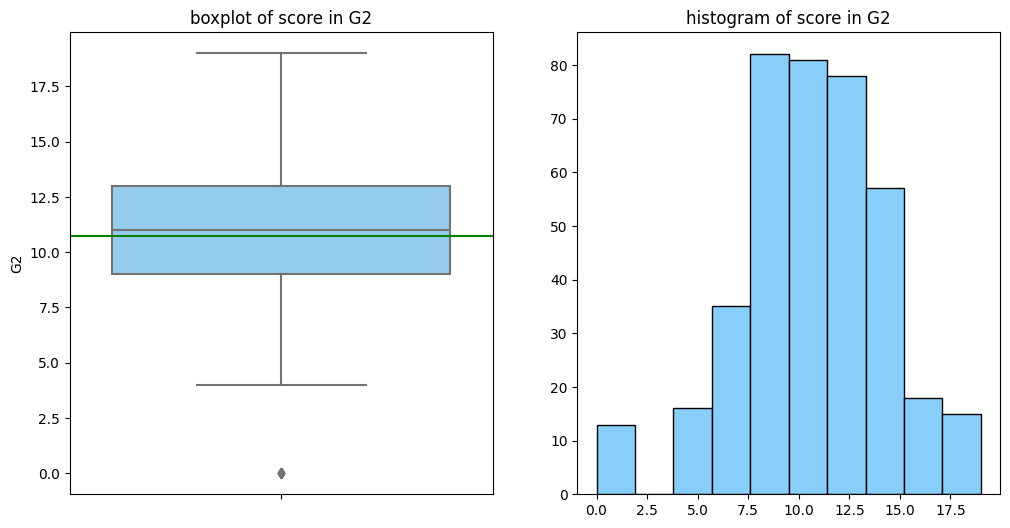

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(y='G2', data=df, color="lightskyblue", ax=axes[0]).set(title="boxplot of score in G2")
axes[0].ylabel = "G2"
axes[0].axhline(y=df['G2'].mean(), color='green')

axes[1].hist(df['G2'], color="lightskyblue", edgecolor="black")
plt.title("histogram of score in G2")

**G3**

In [ ]:
g3_t = pd.crosstab(index=df["G3"], columns="Count")
g3_t = round(g3_t / g3_t.sum(), 3) * 100

Text(0.5, 1.0, 'histogram of score in G3')

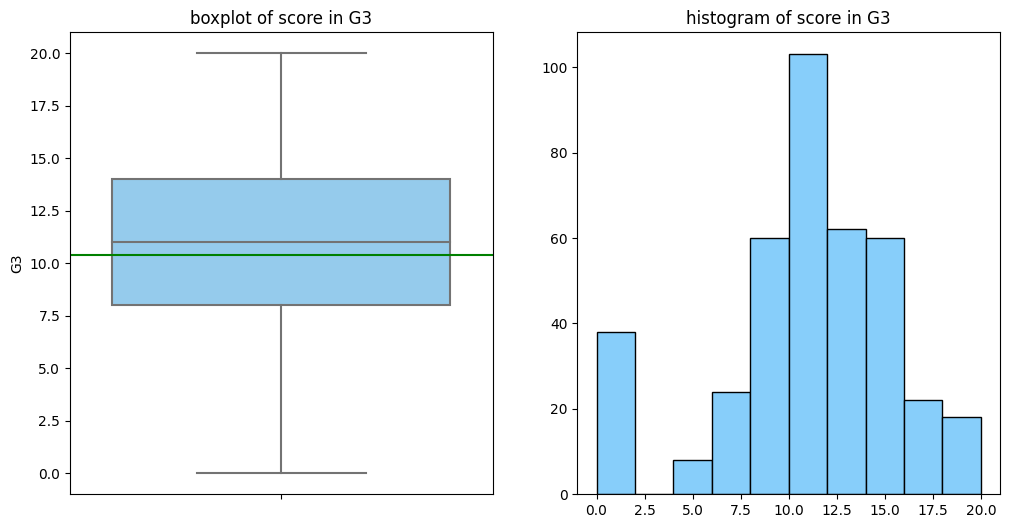

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(y='G3', data=df, color="lightskyblue", ax=axes[0]).set(title="boxplot of score in G3")
axes[0].ylabel = "G3"
axes[0].axhline(y=df['G3'].mean(), color='green')

axes[1].hist(df['G3'], color="lightskyblue", edgecolor="black")
plt.title("histogram of score in G3")

**plot of G3 points and G1, G2, G3 average score lines**

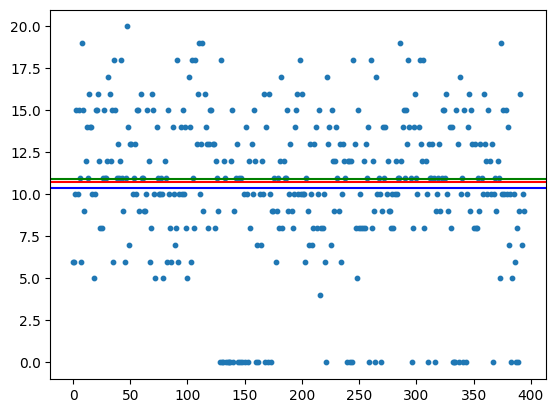

In [ ]:
plt.scatter(df.index, df['G3'], s=10, marker='o', label='G3')
plt.axhline(y=df['G3'].mean(), color='blue')
plt.axhline(y=df['G2'].mean(), color='red')
plt.axhline(y=df['G1'].mean(), color='green')
plt.ylabel = 'G3 Score'
plt.xlabel = 'index'

### Social Aspect

**romantic**

In [ ]:
rom_t = pd.crosstab(index=df["romantic"], columns="Count")
round(rom_t / rom_t.sum(), 3) * 100

col_0,Count
romantic,
no,66.6
yes,33.4


Text(0.5, 1.0, 'Students in Relationship')

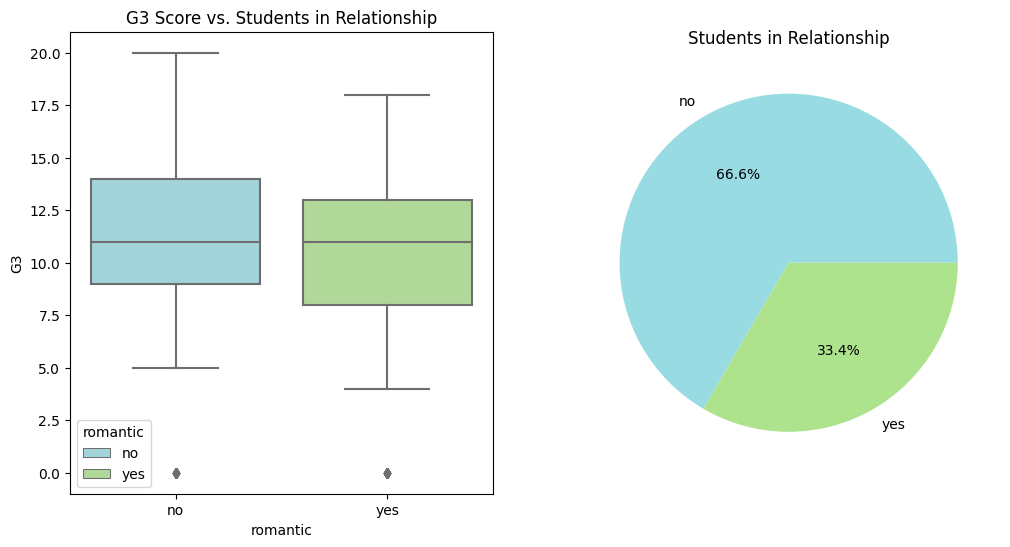

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='romantic', y='G3', data=df, palette=palette_yn, hue='romantic', dodge=False, ax=axes[0]).set(title='G3 Score vs. Students in Relationship')
plt.pie(rom_t['Count'], labels=rom_t.index, colors=color_yn, autopct='%1.01f%%')
plt.title('Students in Relationship')

**Walc**

In [ ]:
walc_t = pd.crosstab(index=df['Walc'], columns='Count')
walc_t/ walc_t.sum()*100

col_0,Count
Walc,
1,38.227848
2,21.518987
3,20.253165
4,12.911392
5,7.088608


Text(0.5, 1.0, 'Alcohol Consumption During Weekend')

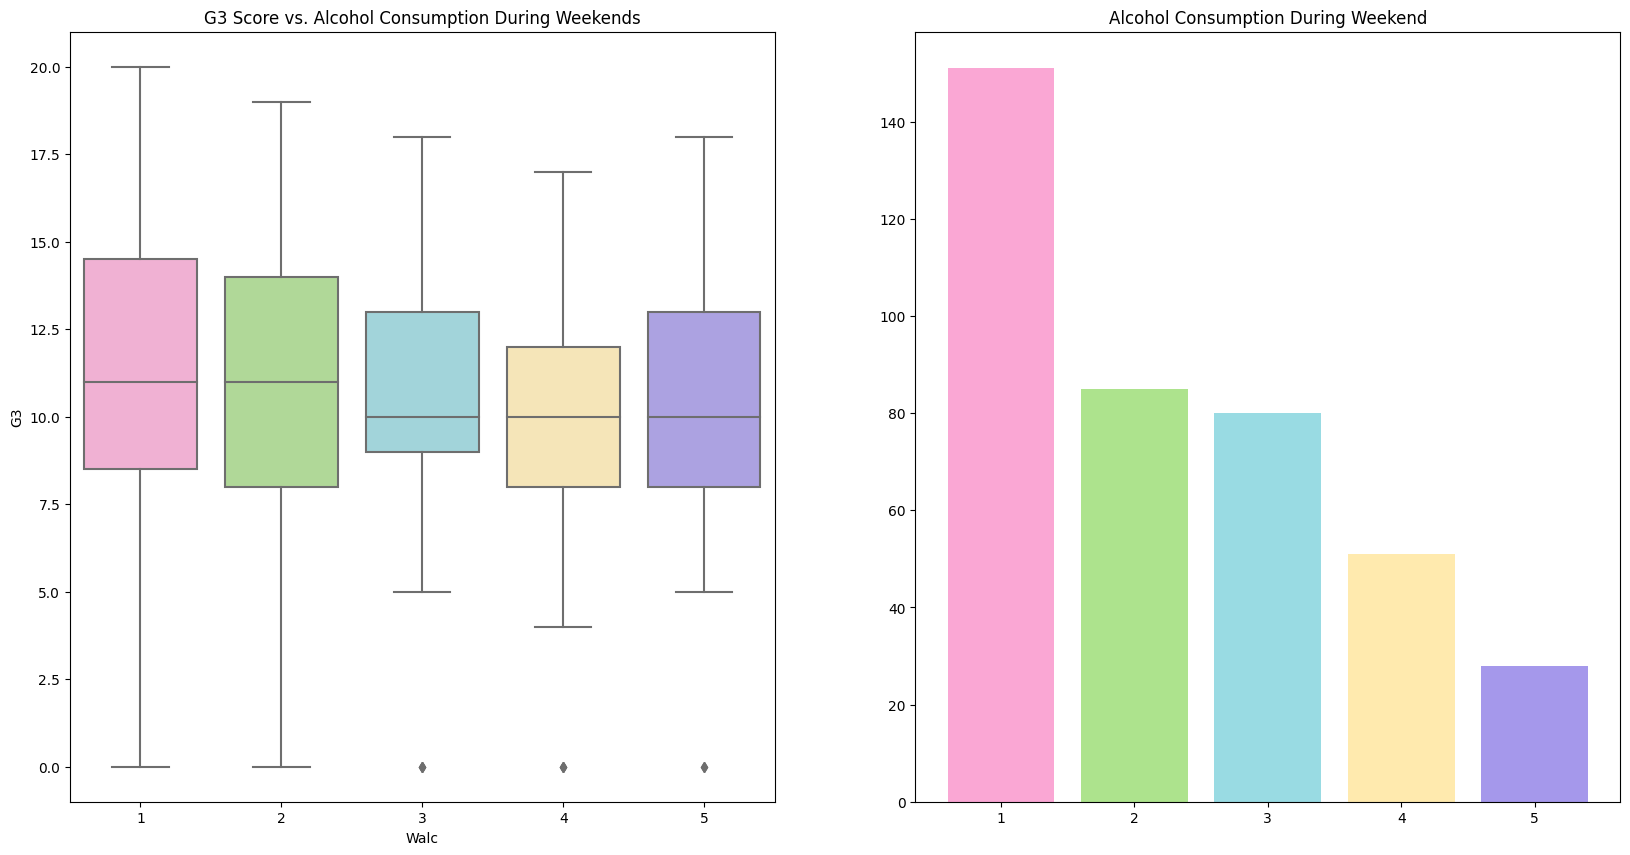

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x='Walc', y='G3', data=df, palette=palette_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Alcohol Consumption During Weekends')
plt.bar(walc_t.index, walc_t["Count"], color=color_rank)
plt.title('Alcohol Consumption During Weekend')

#### **freetime**



In [ ]:
freetime_t = pd.crosstab(index=df['freetime'], columns='Count')
freetime_t = freetime_t/ freetime_t.sum()

Text(0.5, 1.0, 'Free Time')

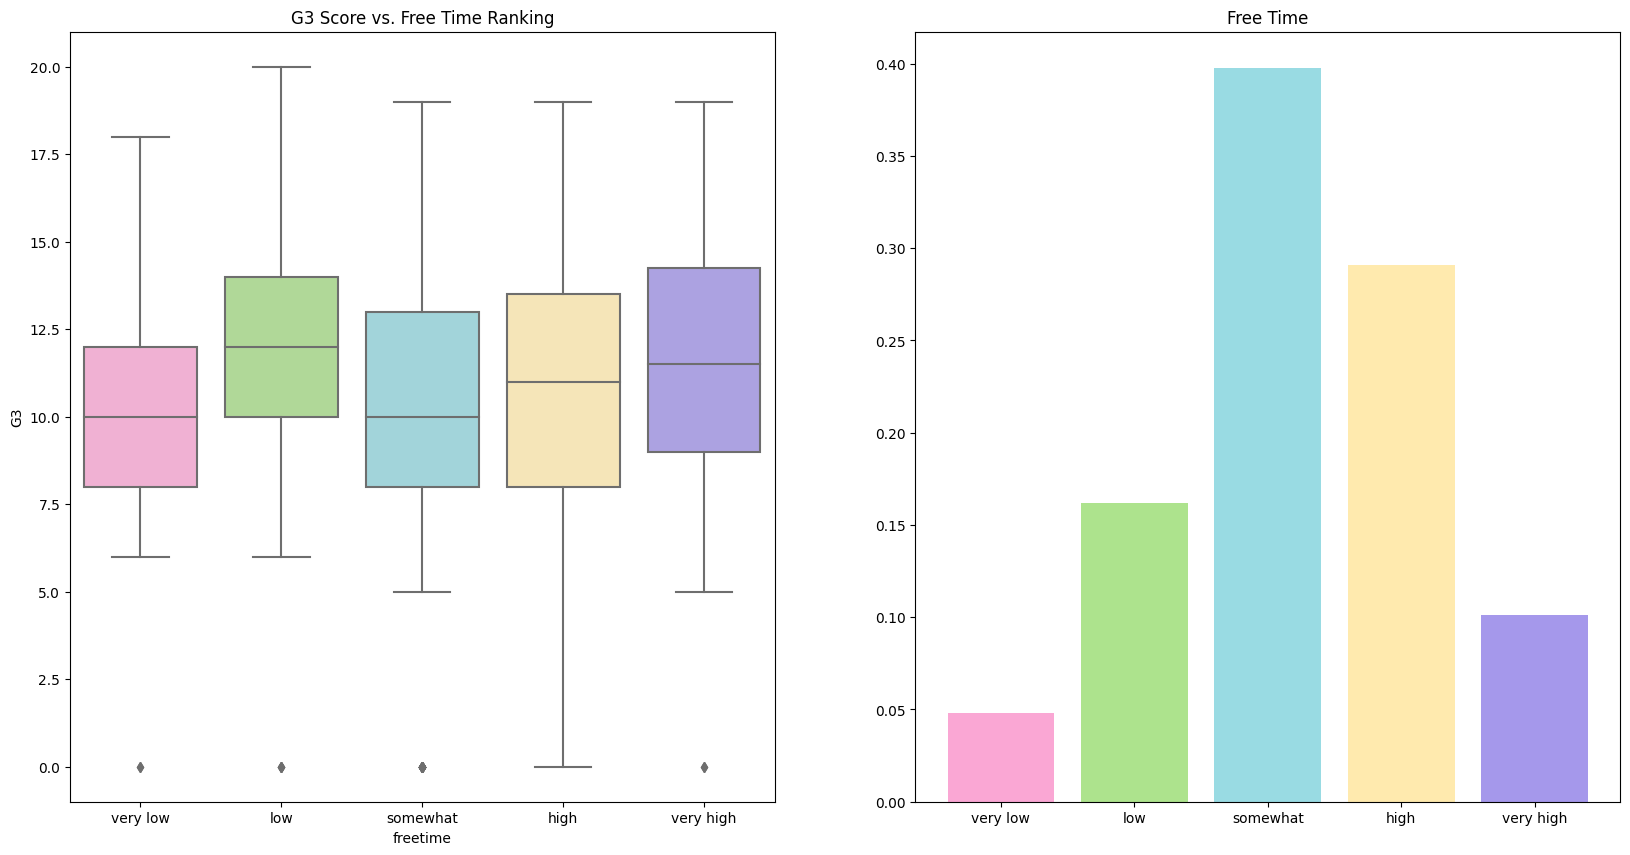

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x='freetime', y='G3', data=df, palette=palette_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Free Time Ranking')
axes[0].set_xticklabels(["very low", "low", "somewhat", "high", "very high"])
plt.bar(freetime_t.index, freetime_t["Count"], color=color_rank)
plt.xticks([1, 2, 3, 4, 5], ["very low", "low", "somewhat", "high", "very high"])
plt.title('Free Time')

**group means compared to average G3 score**

Text(0.5, 1.0, 'Average G3 Score by Free Time Rank')

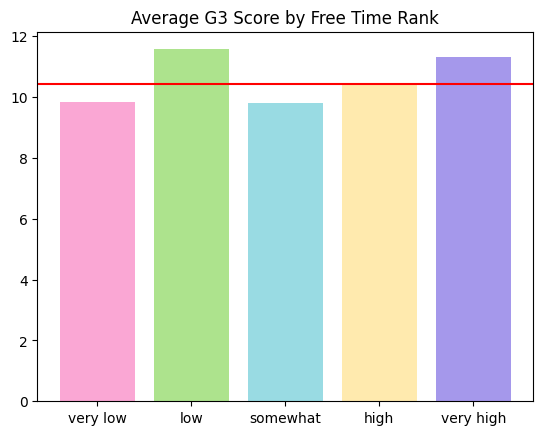

In [ ]:
freetime_mean = df.groupby('freetime')['G3'].mean()
plt.bar(freetime_mean.index, freetime_mean, color=color_rank)
plt.axhline(y=df['G3'].mean(), color='red')
plt.xticks([1, 2, 3, 4, 5], ["very low", "low", "somewhat", "high", "very high"])
plt.title("Average G3 Score by Free Time Rank")


**goout**

In [ ]:
goout_t = pd.crosstab(index=df['goout'], columns='Count')
goout_t = goout_t/ goout_t.sum()

Text(0.5, 1.0, 'Go Out')

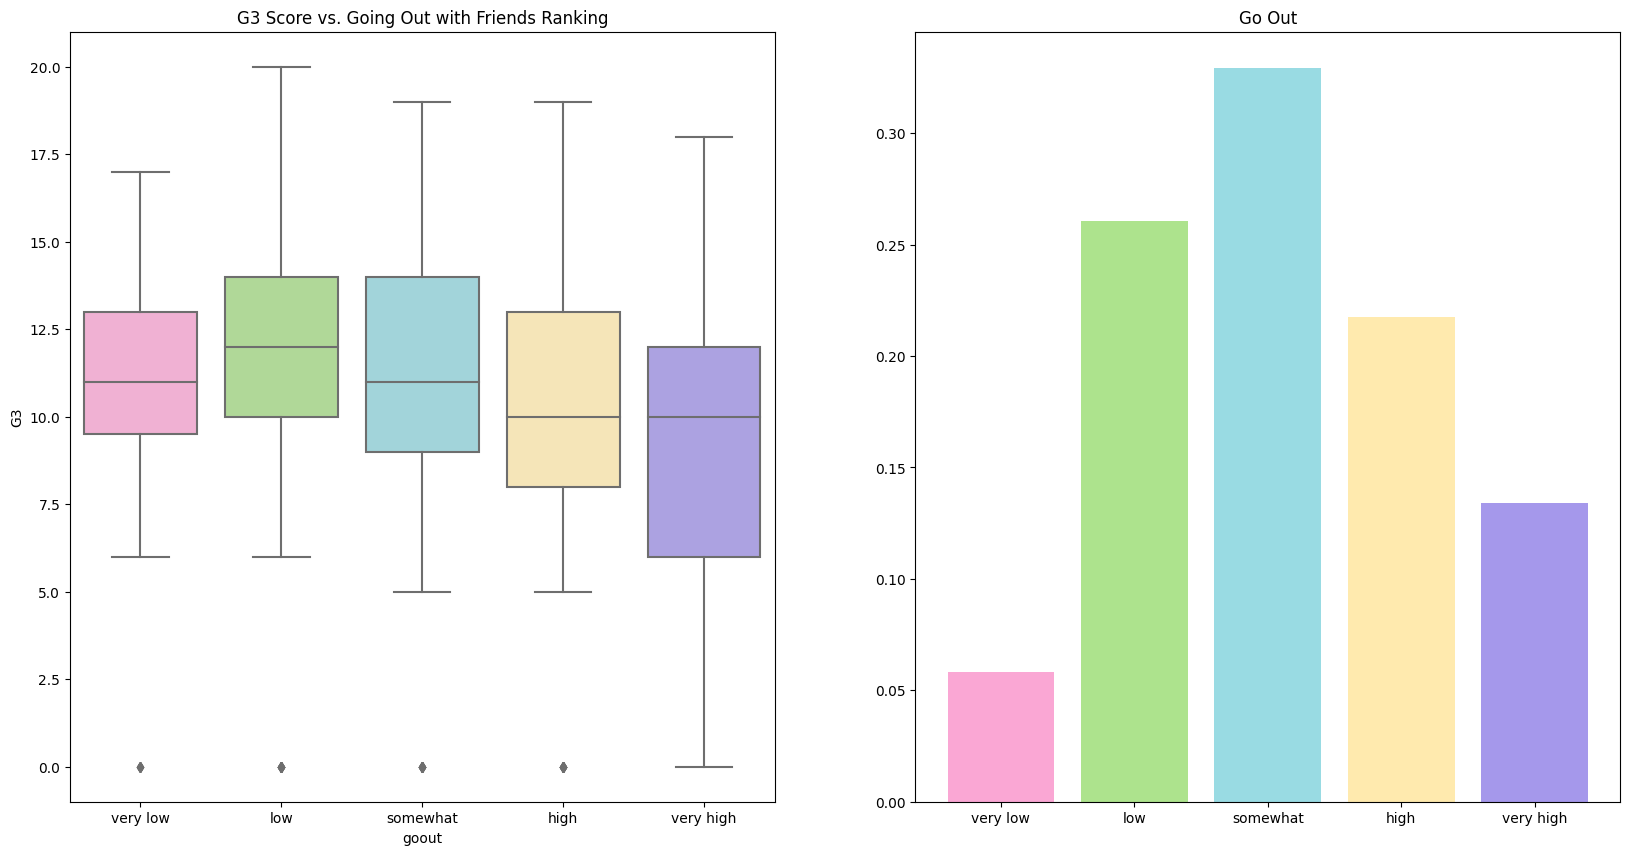

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x='goout', y='G3', data=df, palette=palette_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Going Out with Friends Ranking')
axes[0].set_xticklabels(["very low", "low", "somewhat", "high", "very high"])
plt.bar(goout_t.index, goout_t["Count"], color=color_rank)
plt.xticks([1, 2, 3, 4, 5], ["very low", "low", "somewhat", "high", "very high"])
plt.title('Go Out')

 **Dalc**

In [ ]:
dalc_t = pd.crosstab(index=df['Dalc'], columns='Count')
dalc_t = dalc_t/ dalc_t.sum()

Text(0.5, 1.0, 'Alcohol Consumption During Weekdays')

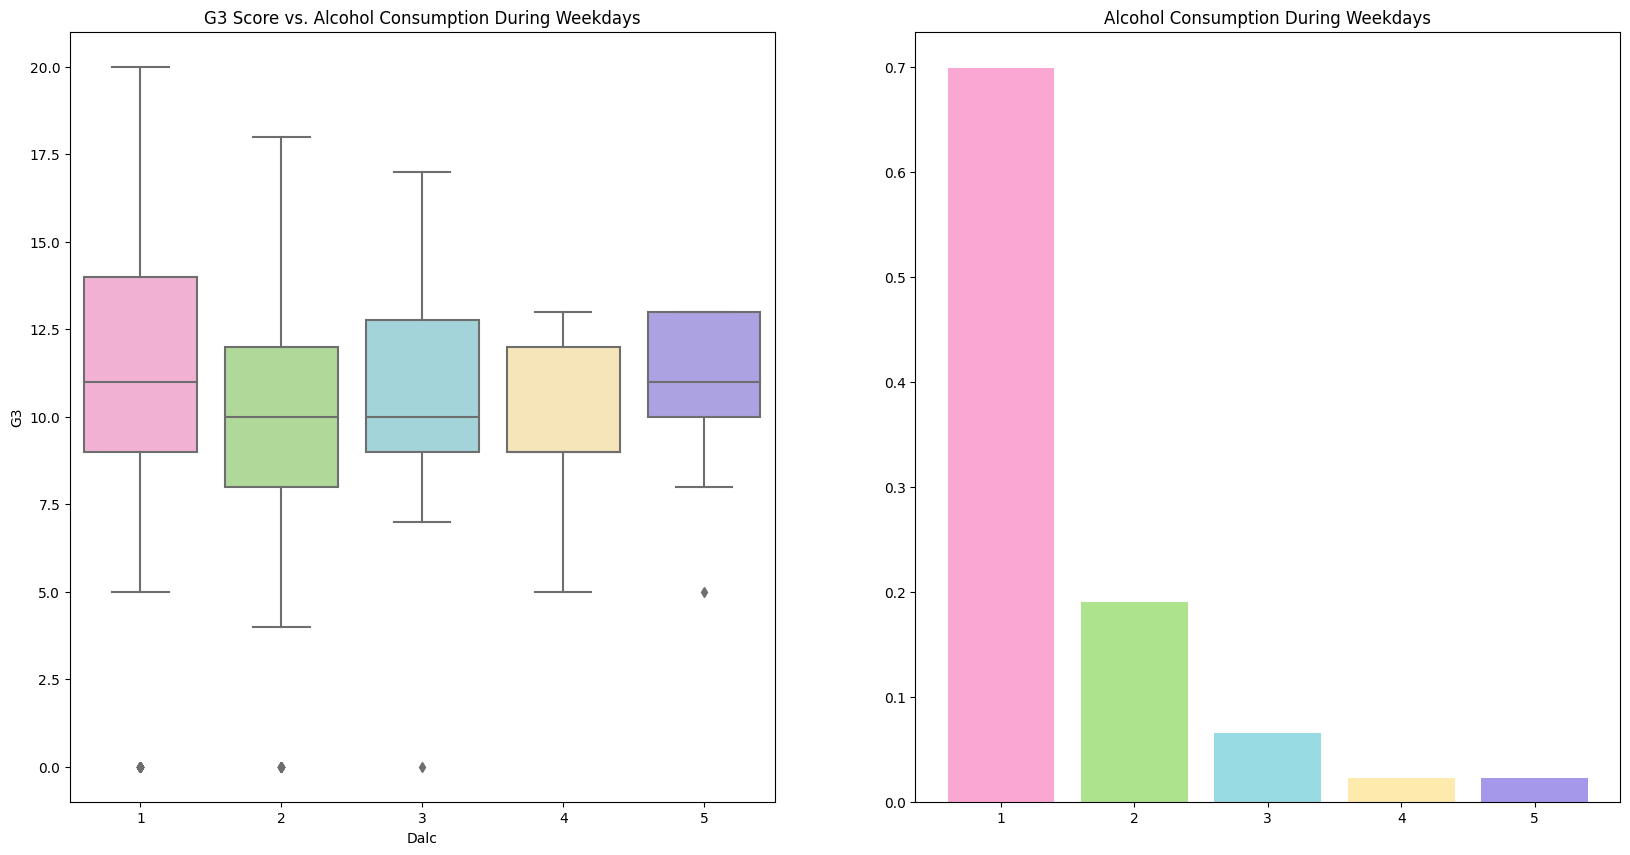

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x='Dalc', y='G3', data=df, palette=palette_rank, dodge=False, ax=axes[0]).set(title='G3 Score vs. Alcohol Consumption During Weekdays')
plt.bar(dalc_t.index, dalc_t["Count"], color=color_rank)
plt.title('Alcohol Consumption During Weekdays')

Text(0, 0.5, 'G3 Score')

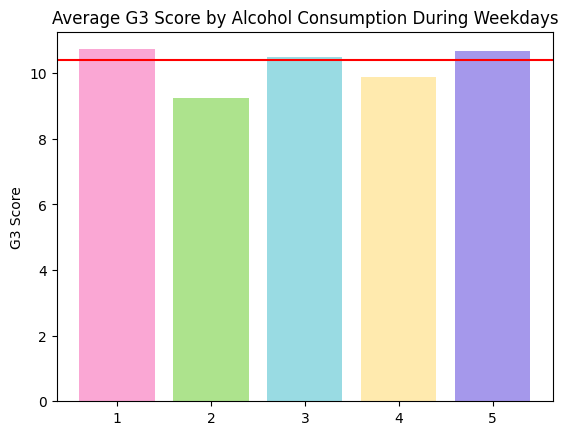

In [ ]:
dalc_mean = df.groupby('Dalc')['G3'].mean()
plt.bar(dalc_mean.index, dalc_mean, color=color_rank)
plt.axhline(y=df['G3'].mean(), color='red')
plt.title("Average G3 Score by Alcohol Consumption During Weekdays")
plt.ylabel("G3 Score")

## Correlation
is there any correlation between variables?

### Individual Aspect

**sex**: Thanks to this model we can understand that there is a positive and significant relation between the final vote and the variable 'sex'. if a student is male the final vote increase of 0.95

In [4]:
G3_by_sex = df.groupby('sex')['G3'].mean().reset_index()
G3_by_sex

,sex,G3
0,F,9.966346
1,M,10.914439


In [7]:
t_stat, p_value = ttest_ind(df[df['sex'] == 'F']['G3'], df[df['sex'] == 'M']['G3'])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -2.061992815503971
P-value: 0.039865332341527636


In [74]:
df['sex'] = pd.Categorical(df['sex'])
sex_cat_matrix = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
df = pd.concat([df, sex_cat_matrix], axis=1)

In [75]:
model = LinearRegression()
X = df[sex_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.94809235]
Intercept: 9.966346153846155


**reason**: there is not a significant relation between the final vote and the variable 'reason'.


In [76]:
G3_by_reason= df.groupby('reason')['G3'].mean().reset_index()
G3_by_reason

,reason,G3
0,course,9.820690
1,home,10.256881
2,other,11.166667
3,reputation,11.142857


In [81]:
df['traveltime'] = pd.Categorical(df['traveltime'])
travel_cat_matrix = pd.get_dummies(df['traveltime'], prefix='traveltime', drop_first=True)
df = pd.concat([df, travel_cat_matrix], axis=1)

In [82]:
X = df[travel_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 4.44161205e+14 -2.26750716e+14 -2.17410488e+14  1.28080389e+12
 -6.40401945e+11 -6.40401945e+11 -3.35542608e+13  8.68628589e+12
  2.48679750e+13]
Intercept: 10.739469658573972


**studytime**: unlike the previous case, in this case the relationship between the variables is positive, in fact for every unit increase in studytime the final grade increases by 0.5340


In [79]:
G3_by_study= df.groupby('studytime')['G3'].mean().reset_index()
G3_by_study

,studytime,G3
0,1,10.047619
1,2,10.171717
2,3,11.400000
3,4,11.259259


In [83]:
df['studytime'] = pd.Categorical(df['studytime'])
study_cat_matrix = pd.get_dummies(df['studytime'], prefix='studytime', drop_first=True)
df = pd.concat([df, study_cat_matrix], axis=1)

X = df[study_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.12409812 1.35238095 1.21164021]
Intercept: 10.047619047619047


**higher**: in this case the relation between the wo variable is significant. if a student want to continue with the study, the final vote increase of 3.8

In [84]:
G3_by_higher= df.groupby('higher')['G3'].mean().reset_index()
G3_by_higher

,higher,G3
0,no,6.800
1,yes,10.608


In [85]:
df['higher'] = pd.Categorical(df['higher'])
higher_cat_matrix = pd.get_dummies(df['higher'], prefix='higher', drop_first=True)
df = pd.concat([df, higher_cat_matrix], axis=1)

X = df[higher_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [3.808]
Intercept: 6.800000000000001


**absences**: variable not significant

In [89]:
X = df[['absences']]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.01960518]
Intercept: 10.30326664345914


**age**: variable is significant. the relation between the age of the student and his final vote is negative. for each unit increment of age, the final vote decrese of -0.5801.


In [90]:
X = df[['age']]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.58012707]
Intercept: 20.101108874945734


correlation_matrix of age, traveltime, studytime, and absences


In [104]:
df[['age', 'traveltime', 'studytime', 'absences']].corr()

,age,traveltime,studytime,absences
age,1.000000,0.070641,-0.004140,0.175230
traveltime,0.070641,1.000000,-0.100909,-0.012944
studytime,-0.004140,-0.100909,1.000000,-0.062700
absences,0.175230,-0.012944,-0.062700,1.000000


further analysis: study time vs gender and studytime vs absences



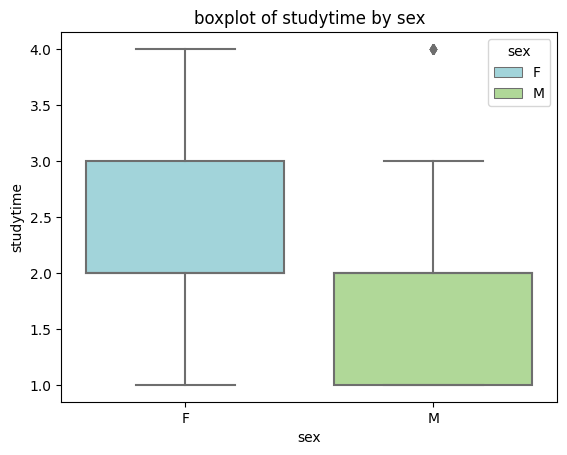

In [113]:
sns.boxplot(x='sex', y='studytime', data=df, palette=color_yn, hue='sex', dodge=False).set(title="boxplot of studytime by sex")
plt.show()

Text(0.5, 1.0, 'Scatterplot of Study Time vs Absences')

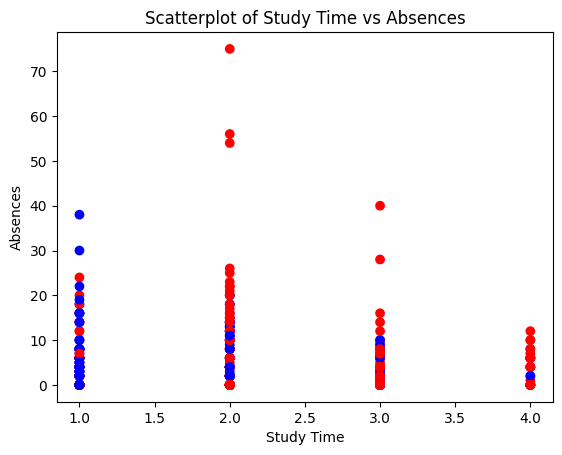

In [115]:
# F: red M: blue
plt.scatter(df['studytime'], df['absences'], c=df['sex'].map({'M': 'blue', 'F': 'red'}), marker='o', label=df['sex'])
plt.xlabel('Study Time')
plt.ylabel('Absences')
plt.title('Scatterplot of Study Time vs Absences')

### Family Background

EDUCATION LEVEL OF FAMILY

is there a relationship between Medu and Fedu?

there is a positive and consistent correlation between the variables

In [117]:
medu_fedu_t = pd.crosstab(df['Medu'], df['Fedu'])
medu_fedu_t

Fedu,0,1,2,3,4
Medu,,,,,
0,0,1,2,0,0
1,1,37,15,5,1
2,0,28,51,17,7
3,0,15,28,38,18
4,1,1,19,40,70


In [121]:
prop_medu_fedu = (medu_fedu_t / medu_fedu_t.sum().sum() * 100).round(2)
prop_medu_fedu

Fedu,0,1,2,3,4
Medu,,,,,
0,0.00,0.25,0.51,0.00,0.00
1,0.25,9.37,3.80,1.27,0.25
2,0.00,7.09,12.91,4.30,1.77
3,0.00,3.80,7.09,9.62,4.56
4,0.25,0.25,4.81,10.13,17.72


In [118]:
df[['Medu', 'Fedu']].corr()

,Medu,Fedu
Medu,1.000000,0.623455
Fedu,0.623455,1.000000


Family_Edu: total education level by adding Fedu and Medu variables to obtain a new variable of the sum of father and mother education


[Text(0.5, 1.0, 'G3 Score vs. Family Education')]

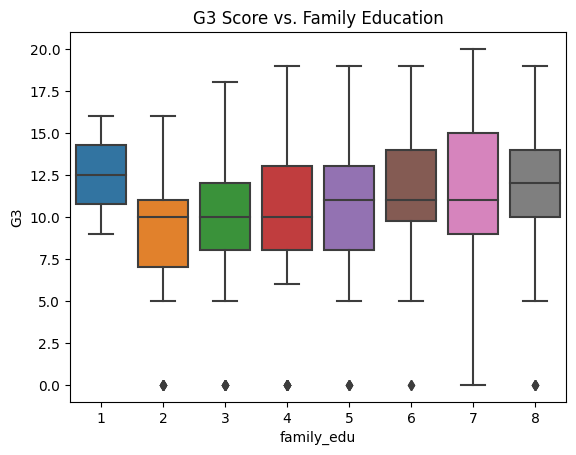

In [130]:
df["family_edu"] = (pd.to_numeric(df['Fedu']) + pd.to_numeric(df['Medu']))
sns.boxplot(x='family_edu', y='G3', data=df, dodge=False).set(title='G3 Score vs. Family Education')

In [131]:
df.groupby('family_edu')['G3'].mean().reset_index()

,family_edu,G3
0,1,12.500000
1,2,8.641026
2,3,9.255814
3,4,9.597222
4,5,10.404255
5,6,11.296875
6,7,10.948276
7,8,11.657143


the effect is positive, if Family edu increase G3 increase: increasing the level of education by 1, G3 score increase by 0.478 points

In [132]:
X = df[["family_edu"]]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.47806261]
Intercept: 7.895376304432331


the effect of Family_edu alone is more significative then the single variables

In [133]:
X = df[["family_edu", "Fedu", "Medu"]]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.31782545 -0.20022672  0.51805218]
Intercept: 7.820527993592657


**Average Family Education Level**: new variable of average of mother and father education level

[Text(0.5, 1.0, 'G3 Score vs. Avg Family Education')]

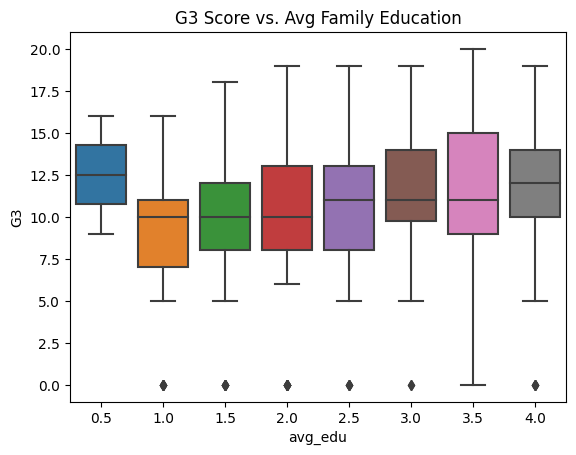

In [135]:
df["avg_edu"] = (pd.to_numeric(df['Fedu']) + pd.to_numeric(df['Medu'])) / 2
sns.boxplot(x='avg_edu', y='G3', data=df, dodge=False).set(title='G3 Score vs. Avg Family Education')

In [136]:
df.groupby('avg_edu')['G3'].mean().reset_index()

,avg_edu,G3
0,0.5,12.500000
1,1.0,8.641026
2,1.5,9.255814
3,2.0,9.597222
4,2.5,10.404255
5,3.0,11.296875
6,3.5,10.948276
7,4.0,11.657143


the effect is positive, if the avarage level of instruction increase G3 increase:
increasing the avarage level of education by 1, G3 score increase by 0.95 points

In [137]:
X = df[["avg_edu"]]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.95612523]
Intercept: 7.895376304432331


the effect of Family_edu alone is more significative then the single variables


In [138]:
X = df[["avg_edu", 'Fedu', 'Medu']]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.31782545 -0.041314    0.6769649 ]
Intercept: 7.8205279935926555


FAMILY STATUS

Famsize and Address: bigger families live in urban areas: urban citiz. are 4.6 more then rural citiz. smaller families prefer urban areas too: the proportion is more balanced (3.1)

In [139]:
size_add_t = pd.crosstab(df['address'], df['famsize'])
size_add_t

famsize,GT3,LE3
address,,
R,68,20
U,213,94


In [140]:
prop_size_add = (size_add_t / size_add_t.sum().sum() * 100).round(2)
prop_size_add

famsize,GT3,LE3
address,,
R,17.22,5.06
U,53.92,23.80


 PSTATUS AND FAMSIZE:  the status divorced balance the distribution of
familysize, 10% of the observation live in divorced family (5.3% have size
less then 3, 5.1% higher then 3)

In [143]:
size_pstat_t = pd.crosstab(df['Pstatus'], df['famsize'])
size_pstat_t

famsize,GT3,LE3
Pstatus,,
A,21,20
T,260,94


In [144]:
prop_pstat_add = (size_pstat_t / size_pstat_t.sum().sum() * 100).round(2)
prop_pstat_add

famsize,GT3,LE3
Pstatus,,
A,5.32,5.06
T,65.82,23.80


FAMREL AND PSTATUS: the parental status don't affect the quality of the relationship, the ratio between the modalities of famrel is the same for A & T

In [145]:
famrel_pstat_t = pd.crosstab(df['Pstatus'], df['famrel'])
famrel_pstat_t

famrel,1,2,3,4,5
Pstatus,,,,,
A,2,3,6,17,13
T,6,15,62,178,93


In [146]:
famrel_pstat_add = (famrel_pstat_t / famrel_pstat_t.sum().sum() * 100).round(2)
famrel_pstat_add

famrel,1,2,3,4,5
Pstatus,,,,,
A,0.51,0.76,1.52,4.30,3.29
T,1.52,3.80,15.70,45.06,23.54


FAMILY EMPLOYMENT STATUS:

Fjob and Mjob: # 43.5% of the parents have the same job, female teachers are double compared to male teachers, fathers at home are 1/3 respects to mothers at home, 11% of the families work in the service sector

In [151]:
pjob_t = pd.crosstab(df['Mjob'], df['Fjob'])
pjob_t

Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,7,2,33,15,2
health,0,6,17,10,1
other,5,2,104,24,6
services,6,4,42,43,8
teacher,2,4,21,19,12


In [152]:
prop_pjob= (pjob_t / pjob_t.sum().sum() * 100).round(2)
prop_pjob

Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,1.77,0.51,8.35,3.80,0.51
health,0.00,1.52,4.30,2.53,0.25
other,1.27,0.51,26.33,6.08,1.52
services,1.52,1.01,10.63,10.89,2.03
teacher,0.51,1.01,5.32,4.81,3.04


In [147]:
df.groupby('Fjob')['G3'].mean().reset_index()

,Fjob,G3
0,at_home,10.150000
1,health,11.611111
2,other,10.193548
3,services,10.297297
4,teacher,11.965517


In [148]:
df.groupby('Mjob')['G3'].mean().reset_index()

,Mjob,G3
0,at_home,9.152542
1,health,12.147059
2,other,9.822695
3,services,11.019417
4,teacher,11.051724


[Text(0.5, 1.0, 'G3 Score vs. Mother Job')]

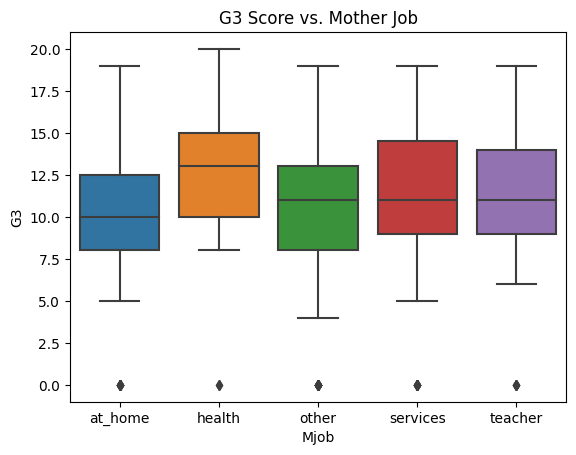

In [149]:
sns.boxplot(x='Mjob', y='G3', data=df, dodge=False).set(title='G3 Score vs. Mother Job')

[Text(0.5, 1.0, 'G3 Score vs. Father Job')]

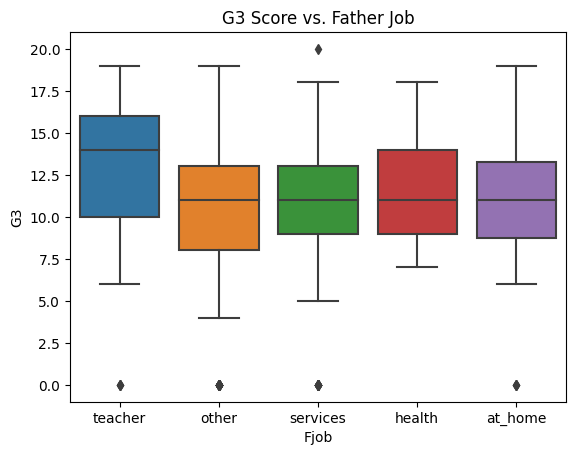

In [150]:
sns.boxplot(x='Fjob', y='G3', data=df, dodge=False).set(title='G3 Score vs. Father Job')

Family_occupation: new variable to account for combination of both mother and father jobs


In [158]:
df["family_occupation"] = df["Mjob"] + '-' + df["Fjob"]
df['family_occupation'] = df.apply(lambda row: row['Mjob'] if row['Mjob'] == row['Fjob'] else row['family_occupation'], axis=1)

[Text(0.5, 1.0, 'G3 Score vs. family occupation')]

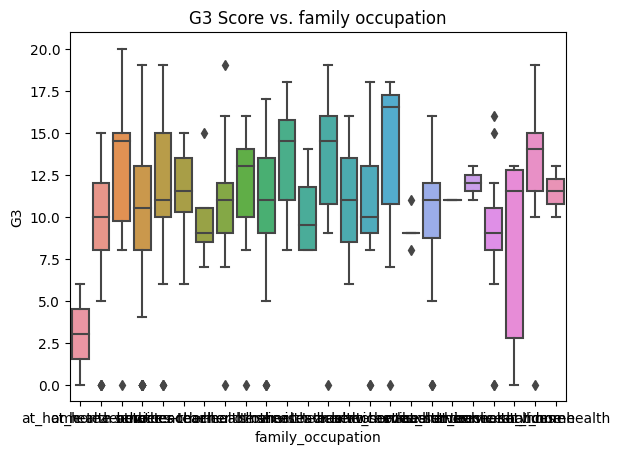

In [159]:
sns.boxplot(x='family_occupation', y='G3', data=df, dodge=False).set(title='G3 Score vs. family occupation')

the effect of the family occupation now is stronger

To isolate the effect of the family work,  plot only the family which have the parents with the same job

In [171]:
df['family_occupation'] = pd.Categorical(df['family_occupation'])
famocc_cat_matrix = pd.get_dummies(df['family_occupation'], prefix='family_occupation', drop_first=True)
df = pd.concat([df, famocc_cat_matrix], axis=1)

X = df[famocc_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-9.43953440e+13  2.22303422e+14  1.41749283e+14  4.10783711e+13
 -4.52442992e+14  1.84616842e+14 -1.47312136e+13  7.47308453e+13
  8.95061810e+13 -1.67119686e+14  1.95613304e+14 -2.20909014e+14
 -3.65994373e+13 -2.78897203e+13  2.14838541e+14  1.52707079e+13
  2.07058105e+14 -3.09019516e+13  1.47408040e+14 -5.55174024e+13
 -1.33808576e+14 -2.87865440e+14 -2.54825025e+13  1.34896358e+13
 -3.59454877e+13 -3.57265303e+13 -4.80652216e+13 -1.82260045e+14
 -3.28822401e+13  3.89029214e+14 -6.52412016e+13 -1.80238180e+14
  3.36624292e+13  5.25557546e+13  5.25557546e+13  5.25557546e+13
 -8.82812500e-01 -4.14062500e-01 -4.37500000e-01 -8.51562500e-01
 -7.89062500e-01 -1.22656250e+00 -1.19531250e+00 -7.26562500e-01
 -7.73437500e-01 -1.19531250e+00 -9.60937500e-01 -6.95312500e-01
  1.56250000e-02  8.59375000e-02  8.59375000e-02  8.59375000e-02
  8.59375000e-02  8.59375000e-02  8.59375000e-02  8.59375000e-02
  8.59375000e-02  8.59375000e-02  8.59375000e-02  8.59375000e-02
  1.0156250

FAMSUP AND FAMREL

In [172]:
famsup_rel_t = pd.crosstab(df['famsup'], df['famrel'])
famsup_rel_t

famrel,1,2,3,4,5
famsup,,,,,
no,3,7,29,67,47
yes,5,11,39,128,59


In [174]:
prop_famsup_rel= (famsup_rel_t / famsup_rel_t.sum().sum() * 100).round(2)
prop_famsup_rel

famrel,1,2,3,4,5
famsup,,,,,
no,0.76,1.77,7.34,16.96,11.90
yes,1.27,2.78,9.87,32.41,14.94


FAMSUP AND FAMSIZE

In [175]:
famsup_size_t = pd.crosstab(df['famsup'], df['famsize'])
famsup_size_t

famsize,GT3,LE3
famsup,,
no,99,54
yes,182,60


In [176]:
prop_famsup_size= (famsup_size_t / famsup_size_t.sum().sum() * 100).round(2)
prop_famsup_size

famsize,GT3,LE3
famsup,,
no,25.06,13.67
yes,46.08,15.19


**FAMILY WELLBEING**

The amount of the indicator is based on the evaluation of the quality of family relationship: 1-5

if the student doesn't recieve any support from the family: Family_Wellbeing +2

if not: Family_Wellbeing + 1

if extra lesson are payed: Family_wellbeing + 2

if not: Family_Wellbeing + 1

In [182]:
# convert paid variable and famsup variable from "yes" and "no" to 1 and 0, respectively
df['paid'] = df['paid'].apply(lambda x: 1 if x == 'yes' else 0)
df['famsup'] = df['famsup'].apply(lambda x: 1 if x == 'yes' else 0)

In [183]:
df["family_wellbeing"] =  (pd.to_numeric(df['paid']) + pd.to_numeric(df['famsup']) + pd.to_numeric(df['famrel']))

In [184]:
X = df[['family_wellbeing']]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.12059986]
Intercept: 9.865620882223755


INTERNET AND FAMILY EDUCATION: increasing the level of education, in average the possibility to have an home Wi-Fi increase


In [186]:
df.groupby('internet')['family_edu'].mean().reset_index()

,internet,family_edu
0,no,4.469697
1,yes,5.431611


[Text(0.5, 1.0, 'Total Family education vs. Internet Access')]

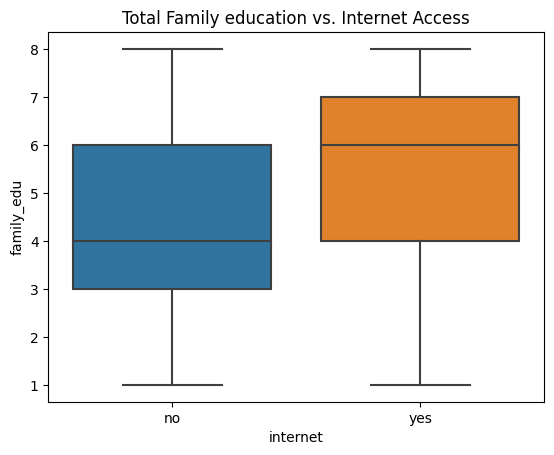

In [185]:
sns.boxplot(x='internet', y='family_edu', data=df, dodge=False).set(title='Total Family education vs. Internet Access')

In [188]:
int_wellbeing_t = pd.crosstab(df['internet'], df['family_wellbeing'])
int_wellbeing_t

family_wellbeing,1,2,3,4,5,6
internet,,,,,,
no,2,2,7,21,26,8
yes,1,10,33,85,149,51


In [189]:
prop_int_wellbeing= (int_wellbeing_t / int_wellbeing_t.sum().sum() * 100).round(2)
prop_int_wellbeing

family_wellbeing,1,2,3,4,5,6
internet,,,,,,
no,0.51,0.51,1.77,5.32,6.58,2.03
yes,0.25,2.53,8.35,21.52,37.72,12.91


family_wellbeing variable, with wifi added

The amount of the indicator is based on the evaluation of the quality of family relationship: 1-5

if the student doesn't recieve any support from the family: Family_Wellbeing +2

if not: Family_Wellbeing + 1

if extra lesson are payed: Family_wellbeing + 2

if not: Family_Wellbeing + 1

if the student have home WiFi: Family_Wellbeing + 2

if not: Family_Wellbeing + 1


In [190]:
df['internet'] = df['internet'].apply(lambda x: 1 if x == 'yes' else 0)
df["family_wellbeing"] =  (pd.to_numeric(df['paid']) + pd.to_numeric(df['famsup']) + pd.to_numeric(df['famrel']) + pd.to_numeric(df['internet']))


GUARDIAN AND INTERNET

In [191]:
guard_int_t = pd.crosstab(df['internet'], df['guardian'])
guard_int_t

guardian,father,mother,other
internet,,,
0,12,47,7
1,78,226,25


### School Aspect

In [270]:
df['schoolsup'] = df['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)
df['activities'] = df['activities'].apply(lambda x: 1 if x == 'yes' else 0)
df['paid'] = df['paid'].apply(lambda x: 1 if x == 'yes' else 0)

SCHOOLSUP AND PAID

In [271]:
schoolsup_paid_t = pd.crosstab(df['paid'], df['schoolsup'])
schoolsup_paid_t

schoolsup,0
paid,
0,395


PAID AND ACTIVITIES

In [272]:
activities_paid_t = pd.crosstab(df['paid'], df['activities'])
activities_paid_t

activities,0
paid,
0,395


**extra_activities**: new variable to account for school support, paying for extra classes, and participating in activities


In [273]:
df['extra_activities'] = (pd.to_numeric(df['paid']) + pd.to_numeric(df['schoolsup']) + pd.to_numeric(df['activities']))


[Text(0.5, 1.0, 'G3 Score vs. extra activities')]

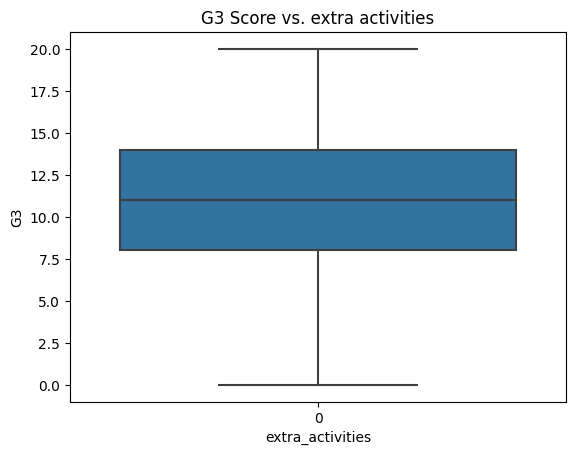

In [274]:
sns.boxplot(x='extra_activities', y='G3', data=df, dodge=False).set(title='G3 Score vs. extra activities')

In [275]:
X = df[['extra_activities']]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.]
Intercept: 10.415189873417722


**average_score**: weighted average of students scores on three tests (G1,G2,G3). the weighting of the score is done using specified weight of 0.15 for G1, 0.25 for G2, 0.6 for G3, because we gave more importance to the final grade.

In [276]:
weight = {"G3":0.6, "G2": 0.25, "G1": 0.15}
df['average_score'] = sum(df[col] * weight[col] for col in weight)


**student_commitment**:

- studytime (numeric variable that has 3 values (1 if the weekly study hours are <2, 2 if they are from 2 to 5, 3 if they are from 5 to 10 hours, and 4 if >10).

- activities: numerical with 2 values (1 or -1)

-higher: numerical with 2 values (1 or -1)

-absence: numerical variable from 0 to 93, cut the variable in 5 breaks and assign 5 to who made many absences, 1 who made few of them. then reverse the orders of the value and create the variable_sintetica as breaks+1 - breaks

- student_commitment: new variable, summed studytime, activities, higher, and absences and multipled studytime by 2 because we gave more importance to the time spent studying and doing so we can see that students who have the highest
points on student_commitment have at the same time the higher average grade. (the point go from 4 to 15)


In [277]:
df['activities'] = df['activities'].apply(lambda x: 1 if x == 'yes' else -1)
df['activities_num'] = pd.to_numeric(df['activities']) - 1

In [278]:
df['higher'] = df['higher'].apply(lambda x: 1 if x == 'yes' else -1)
df['higher_num'] = pd.to_numeric(df['higher']) - 1

In [279]:
intervals = pd.cut(df['absences'], bins=5, labels=False)
df['intervals'] = intervals

In [280]:
synthetic_variables = 6-intervals

In [282]:
df['student_commitment'] = (df['studytime'] * 2) + df['activities_num'] + synthetic_variables + df['higher_num']

### Social Aspect


FREETIME AND GOOUT:

is there a relationship between amount of freetime a student has and how often they go out with friends?


In [11]:
freetime_goout_t = pd.crosstab(df['freetime'], df['goout'])
freetime_goout_t

goout,1,2,3,4,5
freetime,,,,,
1,4,8,5,1,1
2,5,27,17,11,4
3,5,41,70,26,15
4,5,18,34,41,17
5,4,9,4,7,16


In [12]:
prop_total_freetime = (freetime_goout_t / freetime_goout_t.sum().sum() * 100).round(2)
prop_total_freetime

goout,1,2,3,4,5
freetime,,,,,
1,1.01,2.03,1.27,0.25,0.25
2,1.27,6.84,4.30,2.78,1.01
3,1.27,10.38,17.72,6.58,3.80
4,1.27,4.56,8.61,10.38,4.30
5,1.01,2.28,1.01,1.77,4.05


linear regression model: there is no statistically significant relationship between G3 and freetime rank

In [13]:
df['freetime'] = pd.Categorical(df['freetime'])
freetime_cat_matrix = pd.get_dummies(df['freetime'], prefix='freetime', drop_first=True)
df = pd.concat([df, freetime_cat_matrix], axis=1)

In [15]:
X = df[freetime_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.72039474 -0.05866577  0.58398169  1.45789474]
Intercept: 9.842105263157897


there is a statistically significant relationship between G3 and goout rank:
goout rank 2 and 3 are statistically significant goout rank 1 (don't go out with friends often) does not have an effect on G3 therefore, it can be said that students who ranked goout as a 2 will score higher than students who ranked goout as a 3

In [16]:
df['goout'] = pd.Categorical(df['goout'])
goout_cat_matrix = pd.get_dummies(df['goout'], prefix='goout', drop_first=True)
df = pd.concat([df, goout_cat_matrix], axis=1)

In [17]:
X = df[goout_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.32460954  1.09197324 -0.21840243 -0.83182937]
Intercept: 9.869565217391305


FREETIME AND ROMANTIC

is there a relationship between being in a romantic relationship and the amount of freetime a student has?

In [18]:
# convert romantic variable from "yes" and "no" to 1 and 0, respectively
df['romantic'] = df['romantic'].apply(lambda x: 1 if x == 'yes' else 0)


In [20]:
freetime_rom_t = pd.crosstab(df['romantic'],df['freetime'])
freetime_rom_t

freetime,1,2,3,4,5
romantic,,,,,
0,14,39,106,77,27
1,5,25,51,38,13


there is a higher frequency of students that are not in a romantic relationship (blue)

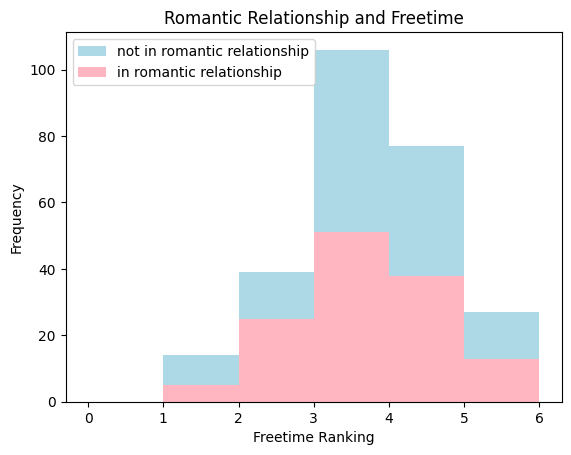

In [27]:
plt.hist([1, 2, 3, 4, 5], weights=[freetime_rom_t.loc[0, i] for i in range(1, 6)], bins=[0, 1, 2, 3, 4, 5, 6], color='lightblue', label='not in romantic relationship')
plt.hist([1, 2, 3, 4, 5], weights=[freetime_rom_t.loc[1, i] for i in range(1, 6)], bins=[0, 1, 2, 3, 4, 5, 6], color='lightpink', label='in romantic relationship')
plt.title("Romantic Relationship and Freetime")
plt.xlabel("Freetime Ranking")
plt.ylabel("Frequency")
plt.legend(loc='upper left')

however, being in a romantic relationship has a stat. significant
effect on G3 - if in a romantic relationship, G3 is 1.2607 points less than if not in romantic relationship

In [29]:
X = df[['romantic']]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.26074433]
Intercept: 10.836501901140686


ROMANTIC AND GOING OUT

is there a relationship between being in a romantic relationship and how often a student goes out with friends?

In [38]:
goout_rom_t = pd.crosstab(df['romantic'],df['goout'])
goout_rom_t

goout,1,2,3,4,5
romantic,,,,,
0,16,67,87,60,33
1,7,36,43,26,20


make separate tables for romantic relationship or not, and go out ranking

In [40]:
goout_rom_no = goout_rom_t.iloc[0]
goout_rom_yes = goout_rom_t.iloc[1]


there is a higher frequency of students that are not in a romantic relationship (blue)

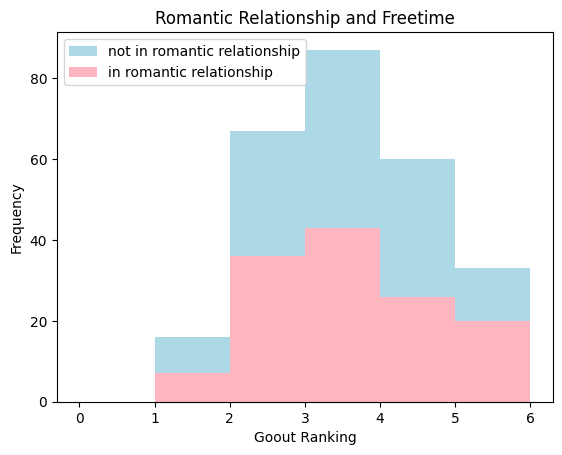

In [41]:
plt.hist([1, 2, 3, 4, 5], weights=[goout_rom_t.loc[0, i] for i in range(1, 6)], bins=[0, 1, 2, 3, 4, 5, 6], color='lightblue', label='not in romantic relationship')
plt.hist([1, 2, 3, 4, 5], weights=[goout_rom_t.loc[1, i] for i in range(1, 6)], bins=[0, 1, 2, 3, 4, 5, 6], color='lightpink', label='in romantic relationship')
plt.title("Romantic Relationship and Freetime")
plt.xlabel("Goout Ranking")
plt.ylabel("Frequency")
plt.legend(loc='upper left')

use wilcoxon ranked test to compare the if the goout ranking is affected by relationship status, p value > 0.05: goout ranking does not depend on if in relationship or not

In [44]:
statistic, p_value = wilcoxon(goout_rom_no, goout_rom_yes)
print("Wilcoxon Statistic:", statistic)
print("P-value:", p_value)

Wilcoxon Statistic: 0.0
P-value: 0.0625


DALC AND WALC

is there a relationship between drinking alcohol during the week and during the weekend?


most students do not drink alcohol during the weekdays, while more students drink alcohol during the weekend

In [45]:
alcohol_t2 = pd.crosstab(df['Dalc'],df['Walc'])
alcohol_t2

Walc,1,2,3,4,5
Dalc,,,,,
1,150,65,42,15,4
2,1,18,29,22,5
3,0,1,8,11,6
4,0,1,1,3,4
5,0,0,0,0,9


Dalc ranking (individually) has no effect on G3, only when Dalc = 2

In [50]:
df['Dalc'] = pd.Categorical(df['Dalc'])
Dalc_cat_matrix = pd.get_dummies(df['Dalc'], prefix='goout', drop_first=True)
df = pd.concat([df, Dalc_cat_matrix], axis=1)

In [47]:
X = df[Dalc_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.41280854 -1.2381596   1.18357195  0.30409641  0.00285774 -0.35244887
 -0.76233365  0.7908847 ]
Intercept: 9.964009686535865


Walc ranking (individually) also has no effect on G3

In [51]:
df['Walc'] = pd.Categorical(df['Walc'])
Walc_cat_matrix = pd.get_dummies(df['Walc'], prefix='goout', drop_first=True)
df = pd.concat([df, Walc_cat_matrix], axis=1)

In [52]:
X = df[Walc_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.46349039 -1.56183223 -0.14539028 -0.14539028 -0.14539028  1.11335844
 -0.23728839  0.27358833  0.27358833  0.27358833 -0.21538386 -0.87501973
  0.17500882  0.17500882  0.17500882 -1.03862752 -0.03627178  0.33693657
  0.33693657  0.33693657]
Intercept: 9.97452405541445


AVG_ALC: new variable of average alcohol consumption between weekend and weekday

In [54]:
df["avg_alc"] = (pd.to_numeric(df['Walc']) + pd.to_numeric(df['Dalc'])) / 2

there are "half values" (1.5, 2.5, etc): to avoid a "half ranking", categorize the half values to the higher of the two rankings

In [60]:
avg_alc_t = pd.crosstab(df["avg_alc"], columns="Count")
avg_alc_t
df['avg_alc'].replace({1.5: 2, 2.5: 3, 3.5: 4, 4.5: 5}, inplace=True)

Text(0.5, 1.0, 'Frequency Table of Avg Alcohol Consumption')

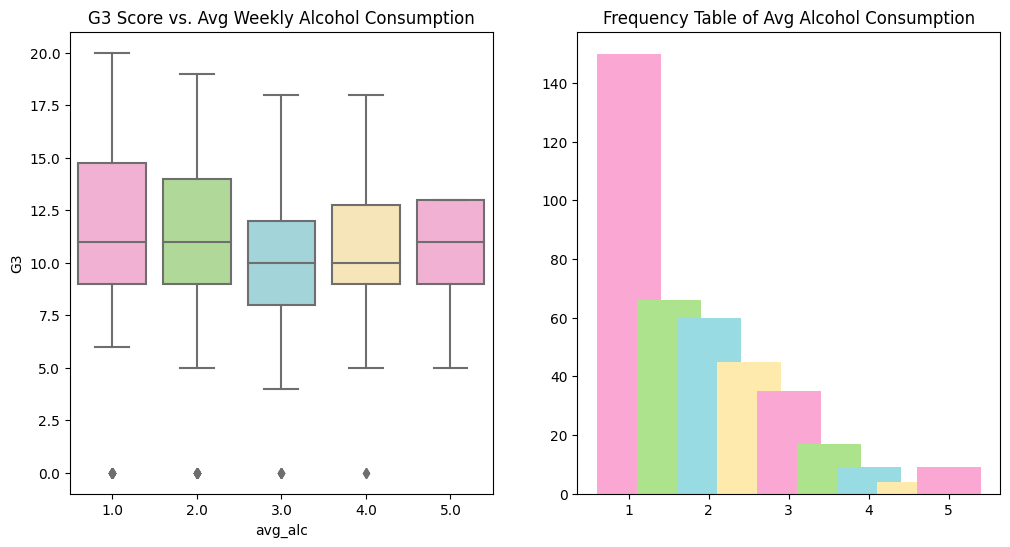

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='avg_alc', y='G3', data=df, palette=("#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"), dodge=False, ax=axes[0]).set(title='G3 Score vs. Avg Weekly Alcohol Consumption')
plt.bar(avg_alc_t.index, avg_alc_t['Count'], color=["#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"])
plt.title("Frequency Table of Avg Alcohol Consumption")

avg alcohol consumption throughout the week also has no effect on G3

In [62]:
df['avg_alc'] = pd.Categorical(df['avg_alc'])
avgalc_cat_matrix = pd.get_dummies(df['avg_alc'], prefix='avg_alc', drop_first=True)
df = pd.concat([df, avgalc_cat_matrix], axis=1)

In [63]:
X = df[avgalc_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.48920635 -0.93166667 -0.49897436 -0.42205128]
Intercept: 10.806666666666667


HEALTH AND ALCOHOL

does health have any relationship with alcohol?

In [65]:
health_avg_alc = pd.crosstab(df["avg_alc"], df["health"])
health_avg_alc

health,1,2,3,4,5
avg_alc,,,,,
1.0,20,15,41,28,46
2.0,16,15,29,20,46
3.0,7,12,14,10,37
4.0,3,3,4,3,13
5.0,1,0,3,5,4


health ranking of 3 and 4 have an effect on G3 score

In [66]:
df['health'] = pd.Categorical(df['health'])
health_alc_cat_matrix = pd.get_dummies(df['health'], prefix='health', drop_first=True)
df = pd.concat([df, health_alc_cat_matrix], axis=1)

In [67]:
X = df[health_alc_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.6501182  -1.86135141 -1.76627982 -1.47508015]
Intercept: 11.872340425531917


combine health and avg_alc: health_avgalc : average of health ranking and alcohol consumption


In [68]:
df["health_avgalc"] = (pd.to_numeric(df['avg_alc']) + pd.to_numeric(df['health'])) / 2

there are "half values" (1.5, 2.5, etc): to avoid a "half ranking",
categorize the half values to the higher of the two rankings

In [70]:
h_avgalc_t = pd.crosstab(df["health_avgalc"], columns="Count")
h_avgalc_t
df['health_avgalc'].replace({1.5: 2, 2.5: 3, 3.5: 4, 4.5: 5}, inplace=True)

Text(0.5, 1.0, 'Frequency Table of Avg Alcohol Consumption and Health')

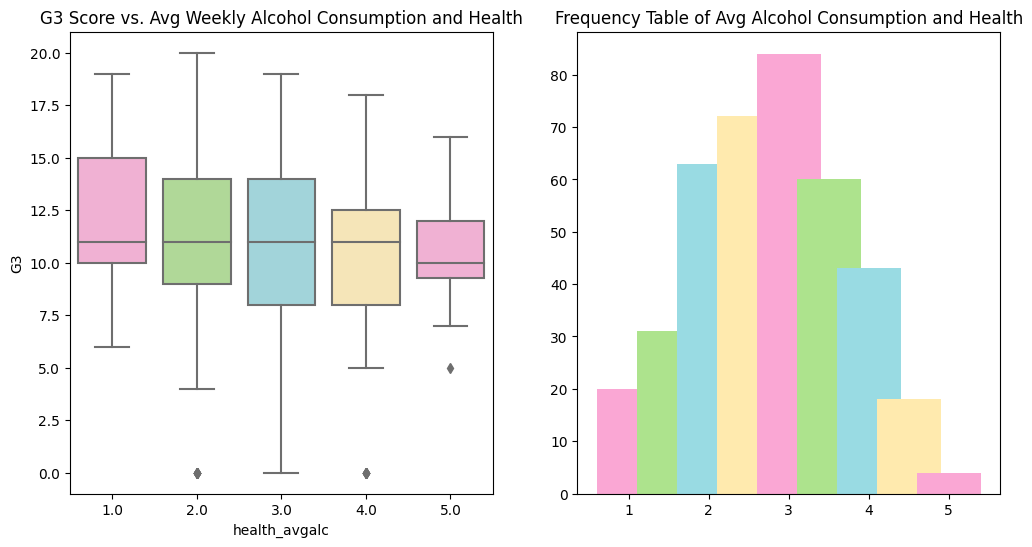

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x='health_avgalc', y='G3', data=df, palette=("#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"), dodge=False, ax=axes[0]).set(title='G3 Score vs. Avg Weekly Alcohol Consumption and Health')
plt.bar(h_avgalc_t.index, h_avgalc_t['Count'], color=["#faa7d4", "#ade38d", "#99dbe3", "#ffeaae"])
plt.title("Frequency Table of Avg Alcohol Consumption and Health")

average health ranking and alcohol consumption of 4 has a significant effect on G3

In [72]:
df['health_avgalc'] = pd.Categorical(df['health_avgalc'])
health_avgalc_cat_matrix = pd.get_dummies(df['health_avgalc'], prefix='health_avgalc', drop_first=True)
df = pd.concat([df, health_avgalc_cat_matrix], axis=1)

In [73]:
X = df[health_avgalc_cat_matrix.columns]
y = df['G3']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.66170213 -1.99230769 -2.30970874 -1.8       ]
Intercept: 12.299999999999999


### Addition analysis of correlation between variables

G1 and G2

In [283]:
df[["G1", "G2"]].corr()

,G1,G2
G1,1.000000,0.852118
G2,0.852118,1.000000


G2 and G3

In [284]:
df[["G3", "G2"]].corr()

,G3,G2
G3,1.000000,0.904868
G2,0.904868,1.000000


G1 and G3

In [285]:
df[["G1", "G3"]].corr()

,G1,G3
G1,1.000000,0.801468
G3,0.801468,1.000000


G3 and absences

In [286]:
df[["G3", "absences"]].corr()

,G3,absences
G3,1.000000,0.034247
absences,0.034247,1.000000


combined correlation matrix:

In [287]:
df[["G1", "G2", "G3", "absences", "failures"]].corr()

,G1,G2,G3,absences,failures
G1,1.000000,0.852118,0.801468,-0.031003,-0.354718
G2,0.852118,1.000000,0.904868,-0.031777,-0.355896
G3,0.801468,0.904868,1.000000,0.034247,-0.360415
absences,-0.031003,-0.031777,0.034247,1.000000,0.063726
failures,-0.354718,-0.355896,-0.360415,0.063726,1.000000


heatmap of correlations

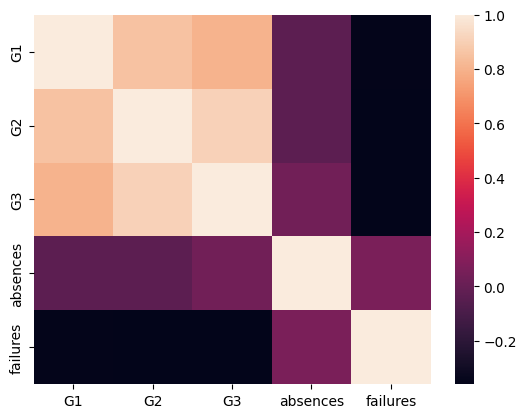

In [288]:
sns.heatmap(df[["G1", "G2", "G3", "absences", "failures"]].corr());